<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Lincense_Plate_Extraction_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10

Cloning into 'yolov10'...
remote: Enumerating objects: 20332, done.
remote: Counting objects: 100% (2446/2446), done.
remote: Compressing objects: 100% (250/250), done.
remote: Total 20332 (delta 2317), reused 2197 (delta 2196), pack-reused 17886 (from 1)
Receiving objects: 100% (20332/20332), 11.14 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (14337/14337), done.
/content/yolov10


In [2]:
!pip install -q .

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
import os
import urllib.request
#Create a directory for the weights in the current working directory
weights_dir = os.path.join(os.getcwd(), 'weights')
os.makedirs(weights_dir, exist_ok = True)
#urls of the weights file
urls = ["https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10s.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10m.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10b.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10l.pt",
        "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10x.pt"]

#Download each file
for url in urls:
  filename = os.path.basename(url)
  filepath = os.path.join(weights_dir, filename)
  urllib.request.urlretrieve(url, filepath)
  print(f"Downloaded: {filepath}")

Downloaded: /content/yolov10/weights/yolov10n.pt
Downloaded: /content/yolov10/weights/yolov10s.pt
Downloaded: /content/yolov10/weights/yolov10m.pt
Downloaded: /content/yolov10/weights/yolov10b.pt
Downloaded: /content/yolov10/weights/yolov10l.pt
Downloaded: /content/yolov10/weights/yolov10x.pt


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8joVH7TL2k5V6uScFBEy")
project = rf.workspace("moin").project("car_license_plates")
version = project.version(2)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Car_License_Plates-2 in yolov8:: 100%|██████████| 1436/1436 [00:00<00:00, 4392.08it/s]


In [5]:
%cd '/content/yolov10'

/content/yolov10


In [25]:
!yolo task=detect mode=train epochs=100 batch=16 plots=True model='weights/yolov10n.pt' data='Car_License_Plates-2/data.yaml'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
New https://py

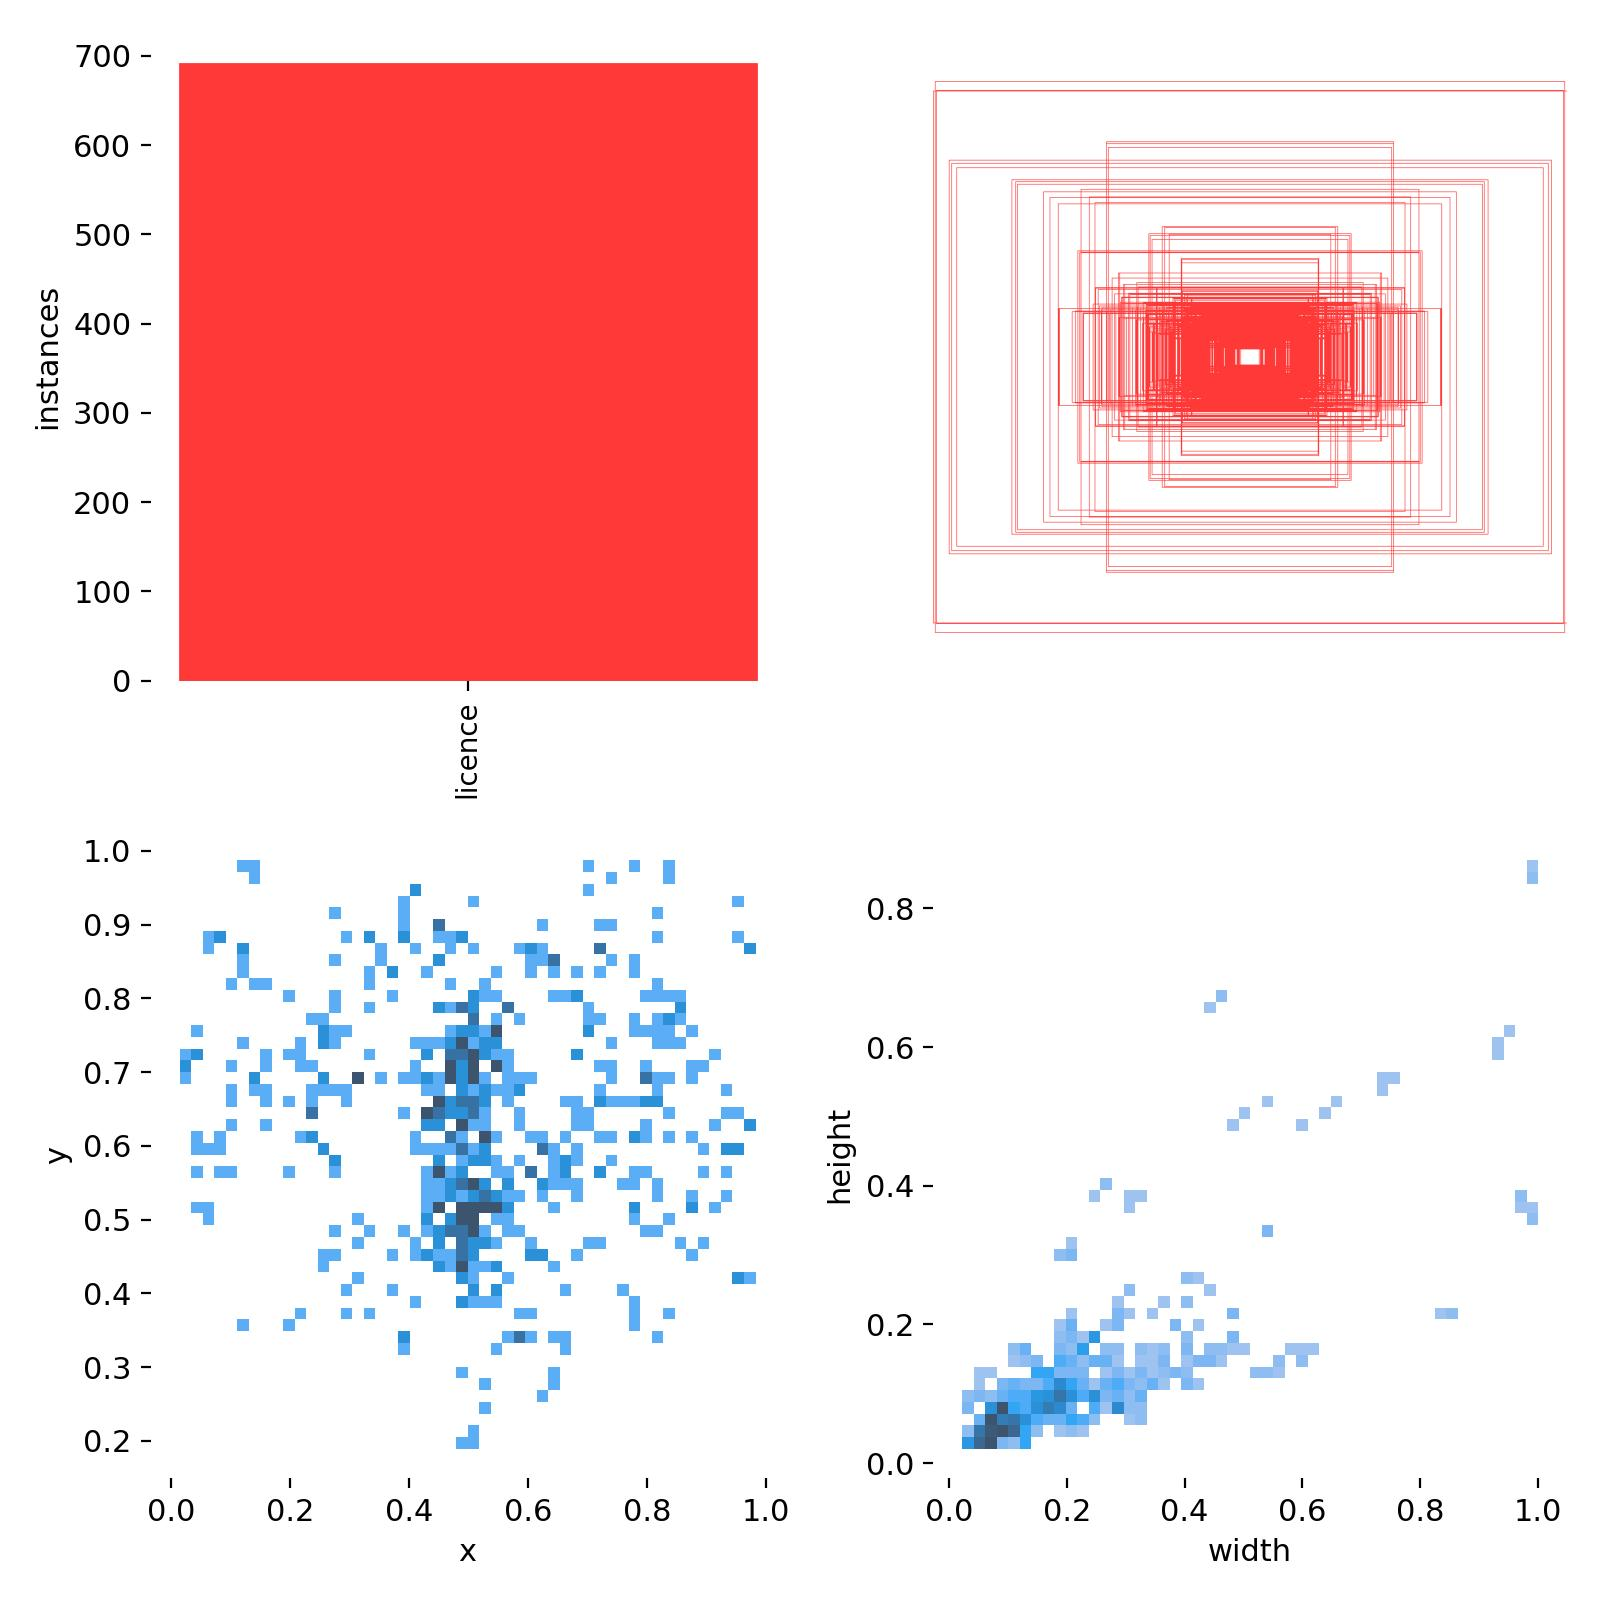

In [26]:
from IPython.display import Image

Image("/content/yolov10/runs/detect/train5/labels.jpg")

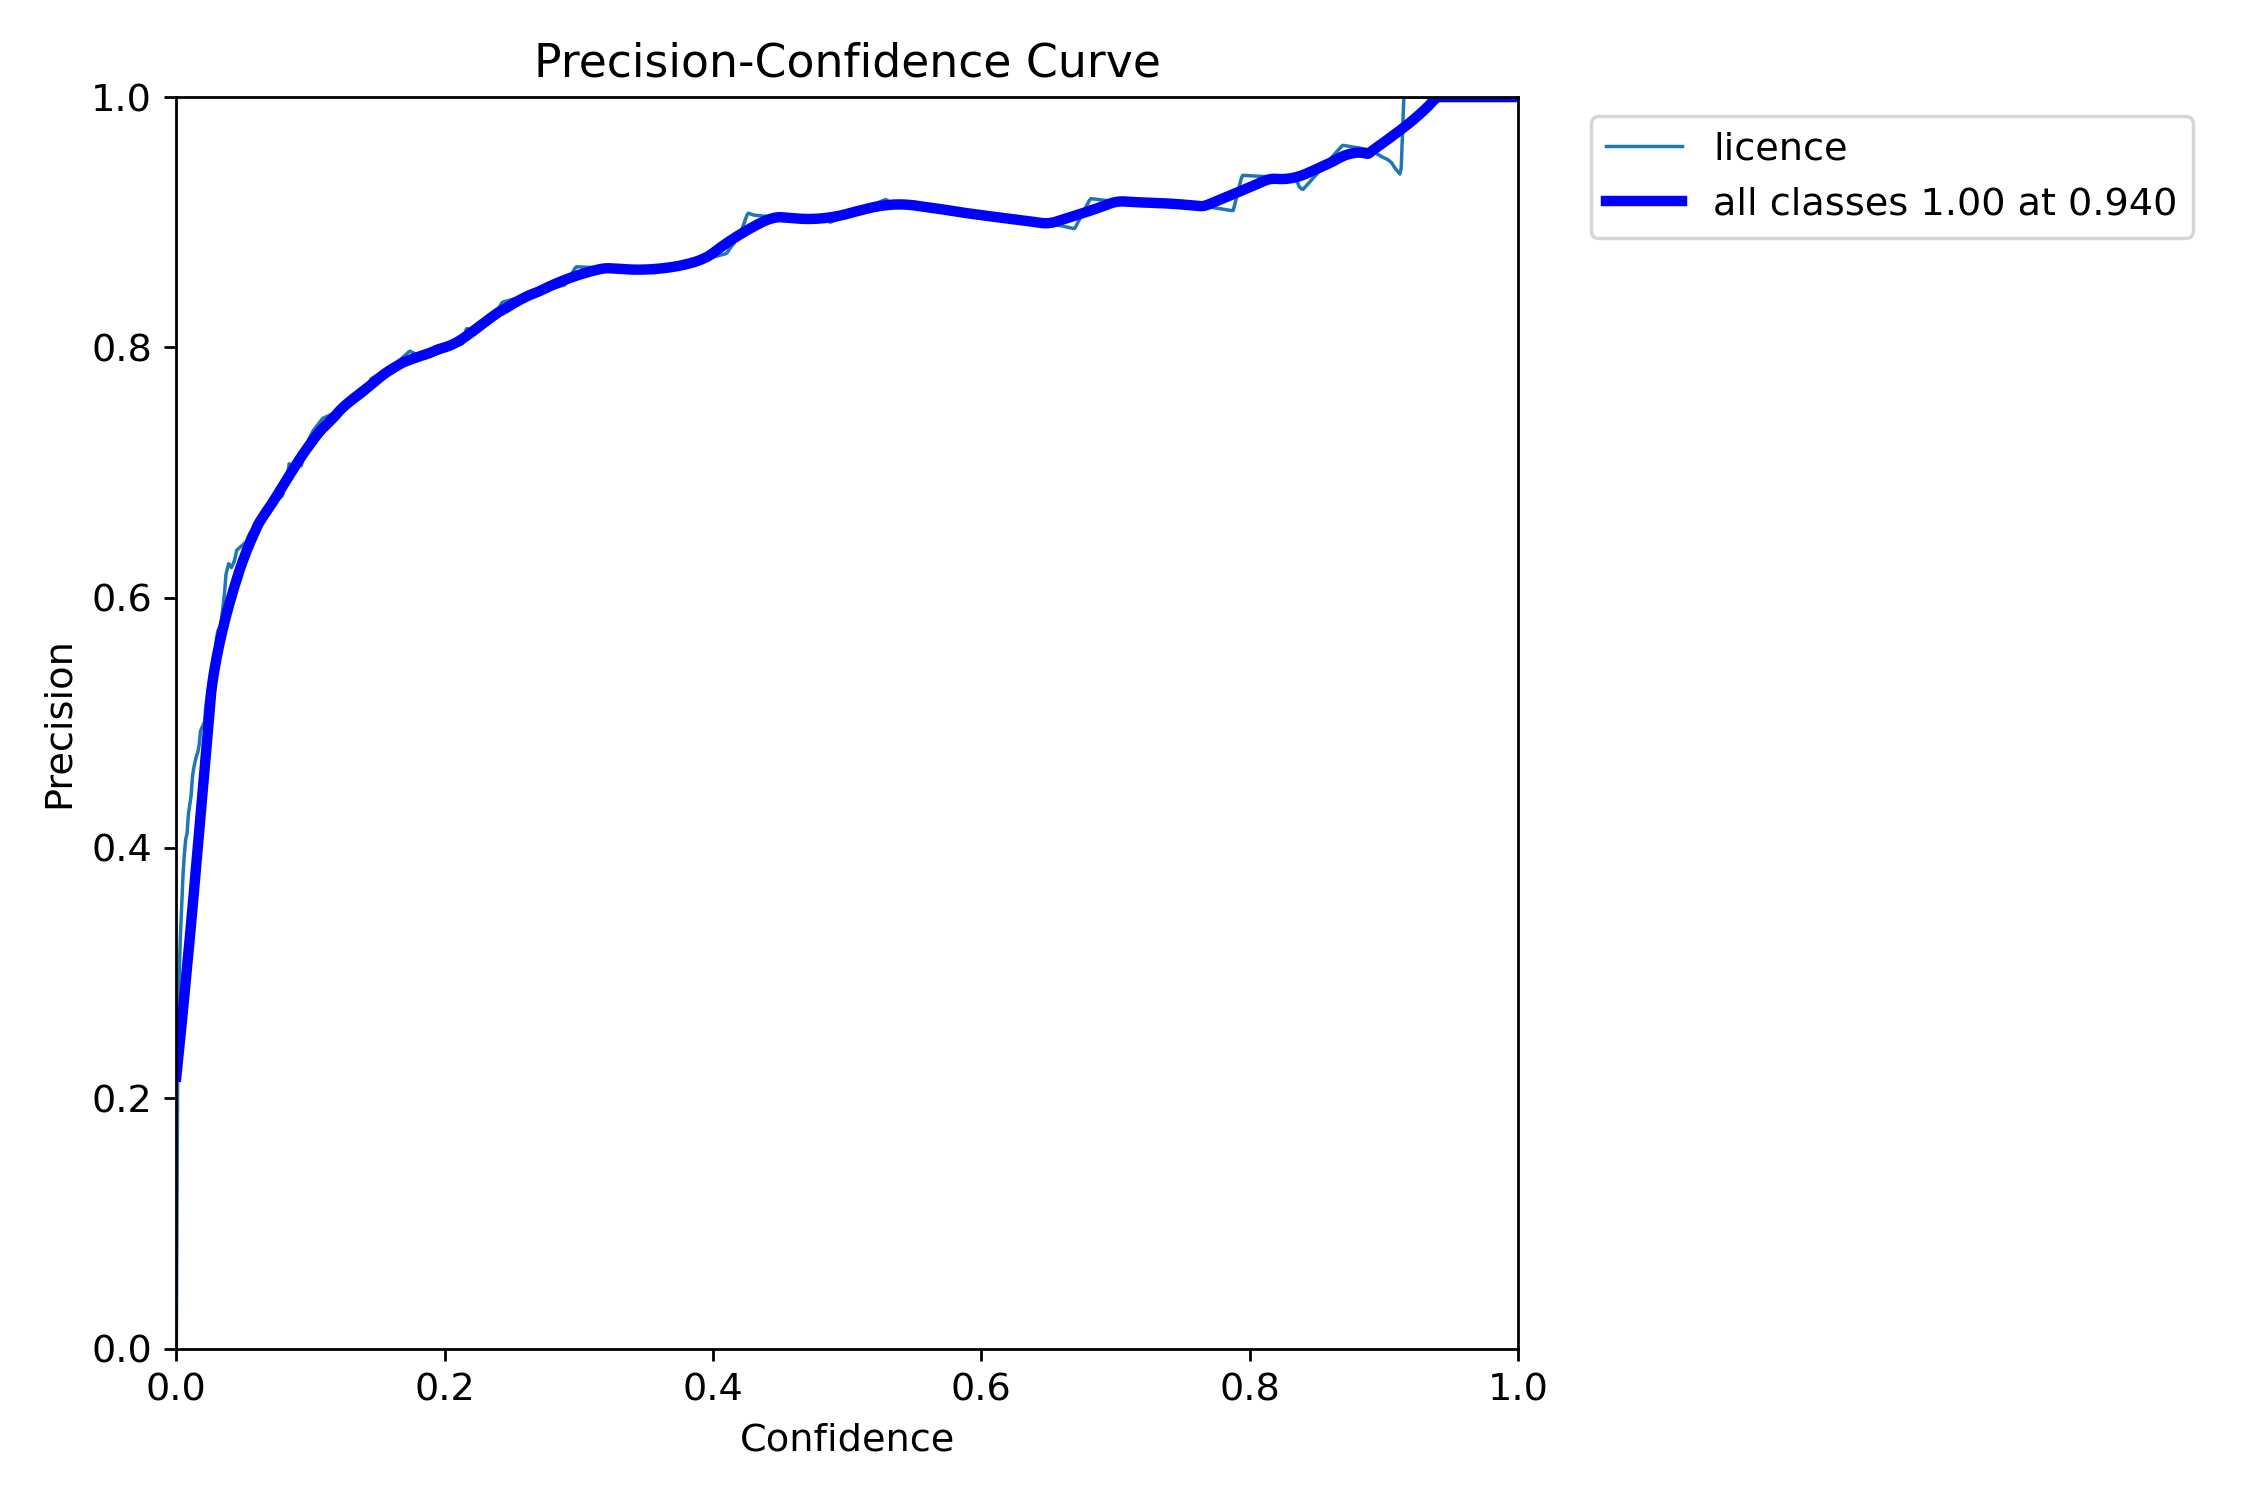

In [27]:

Image("/content/yolov10/runs/detect/train5/P_curve.png")

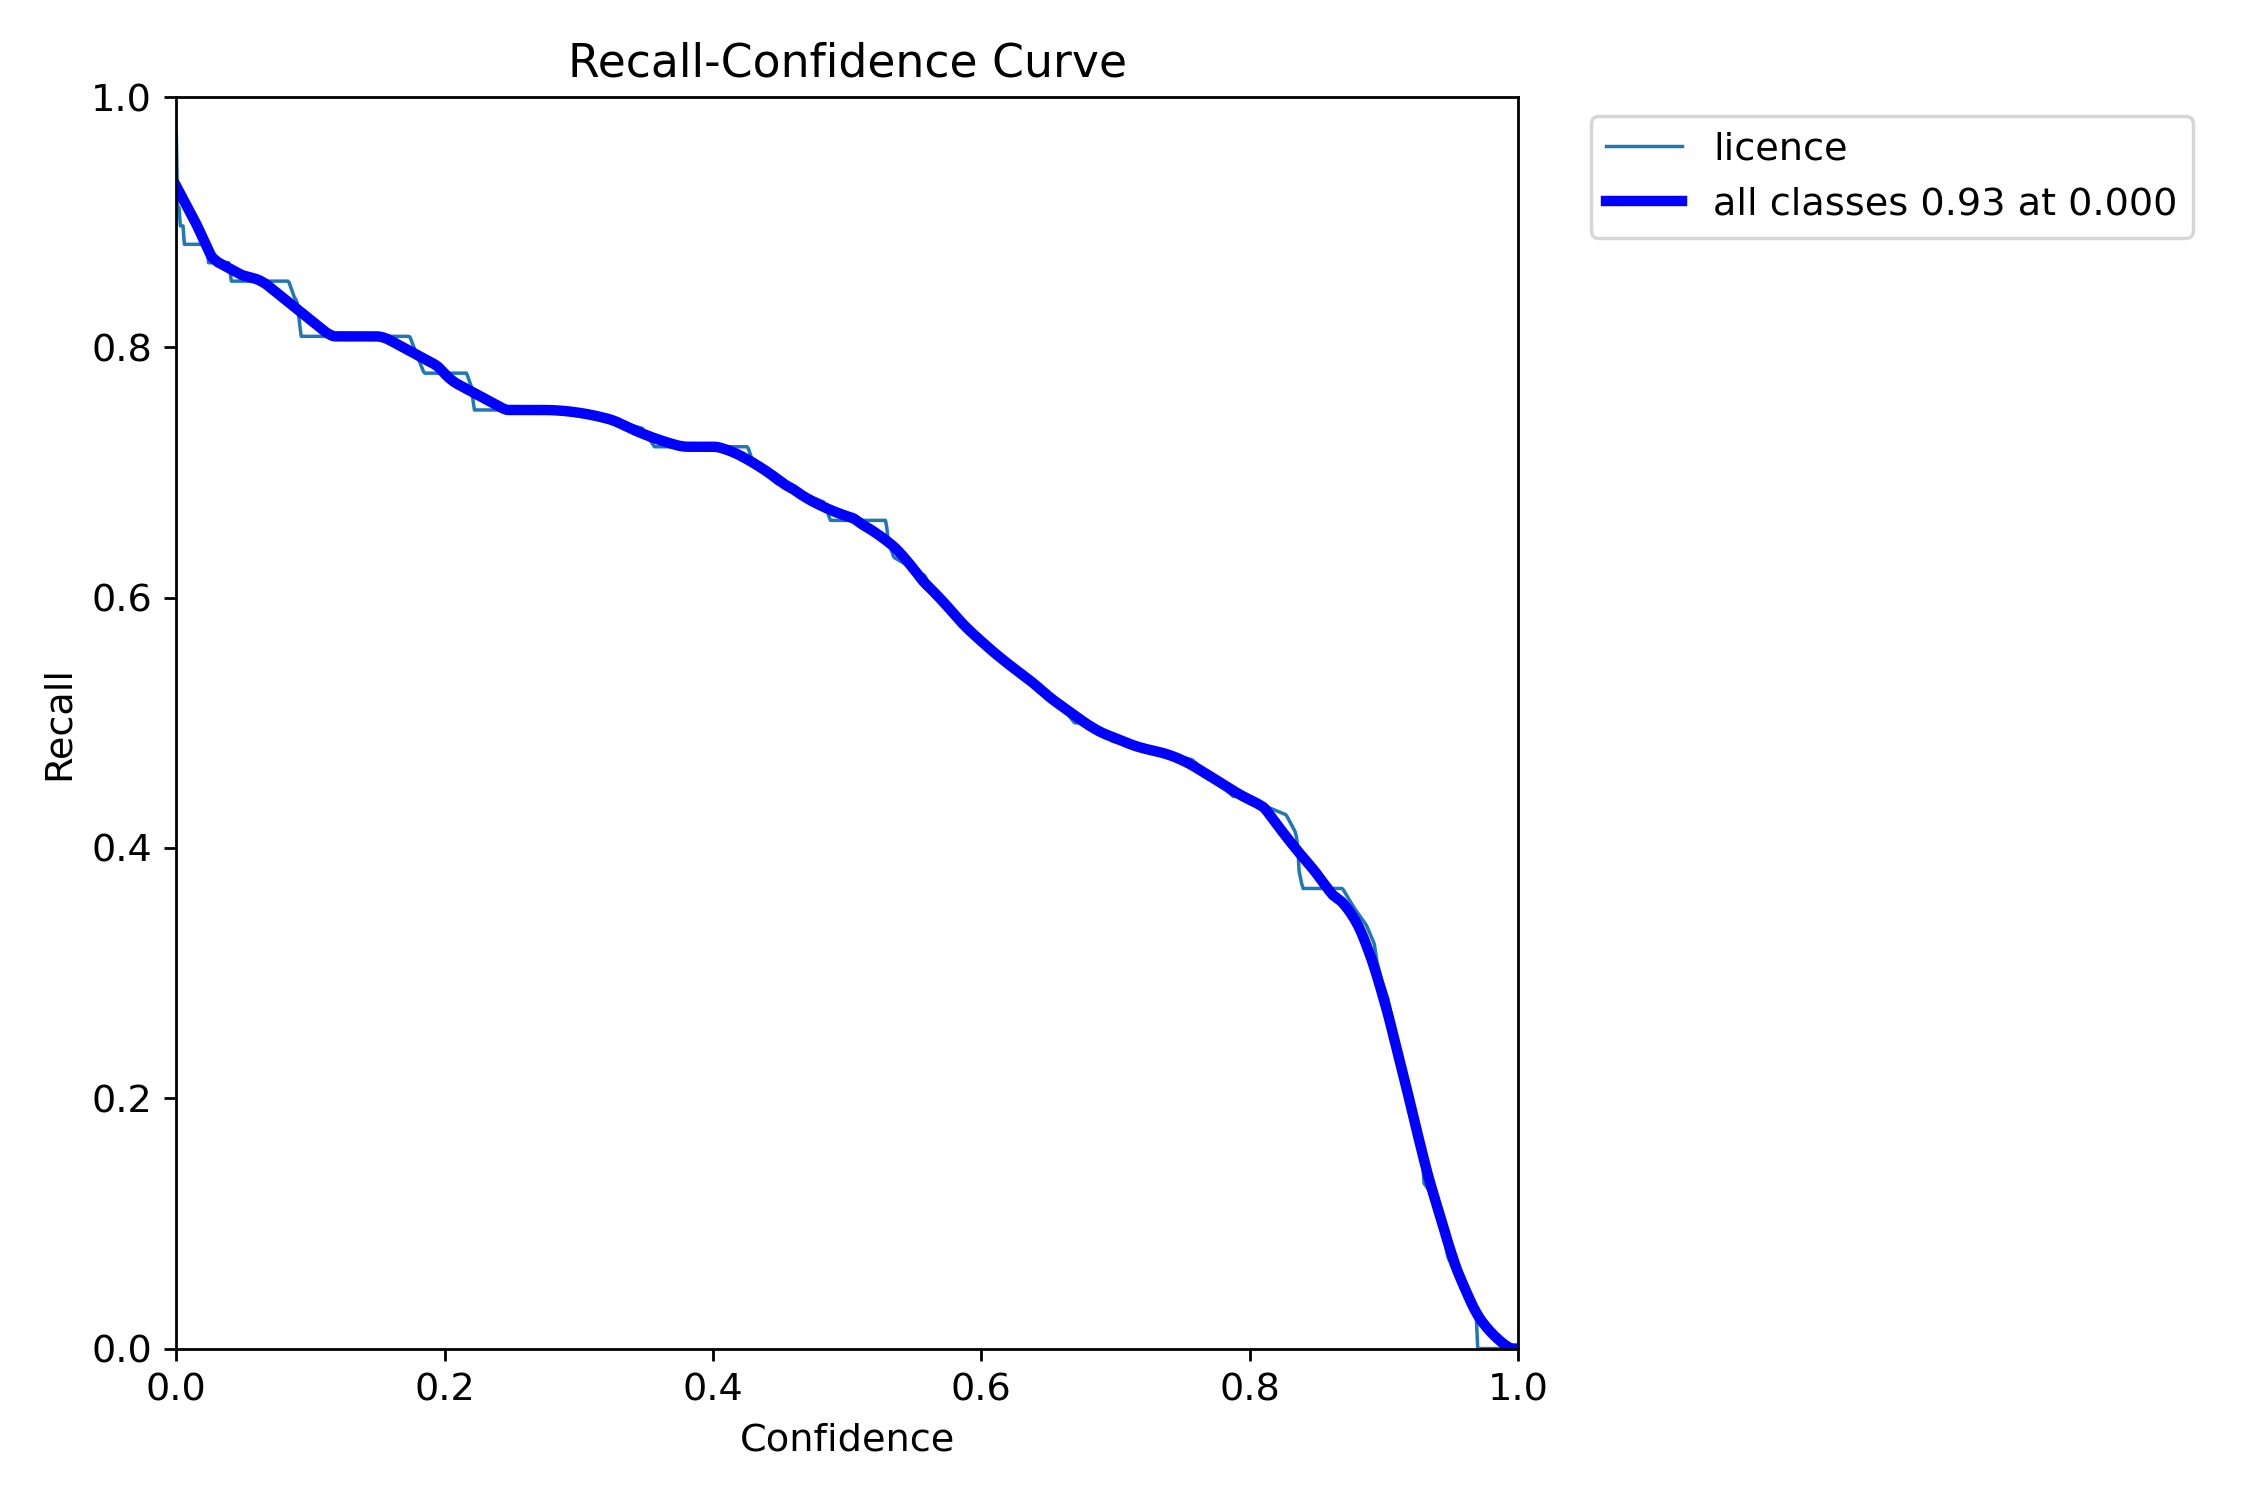

In [28]:


Image("/content/yolov10/runs/detect/train5/R_curve.png")

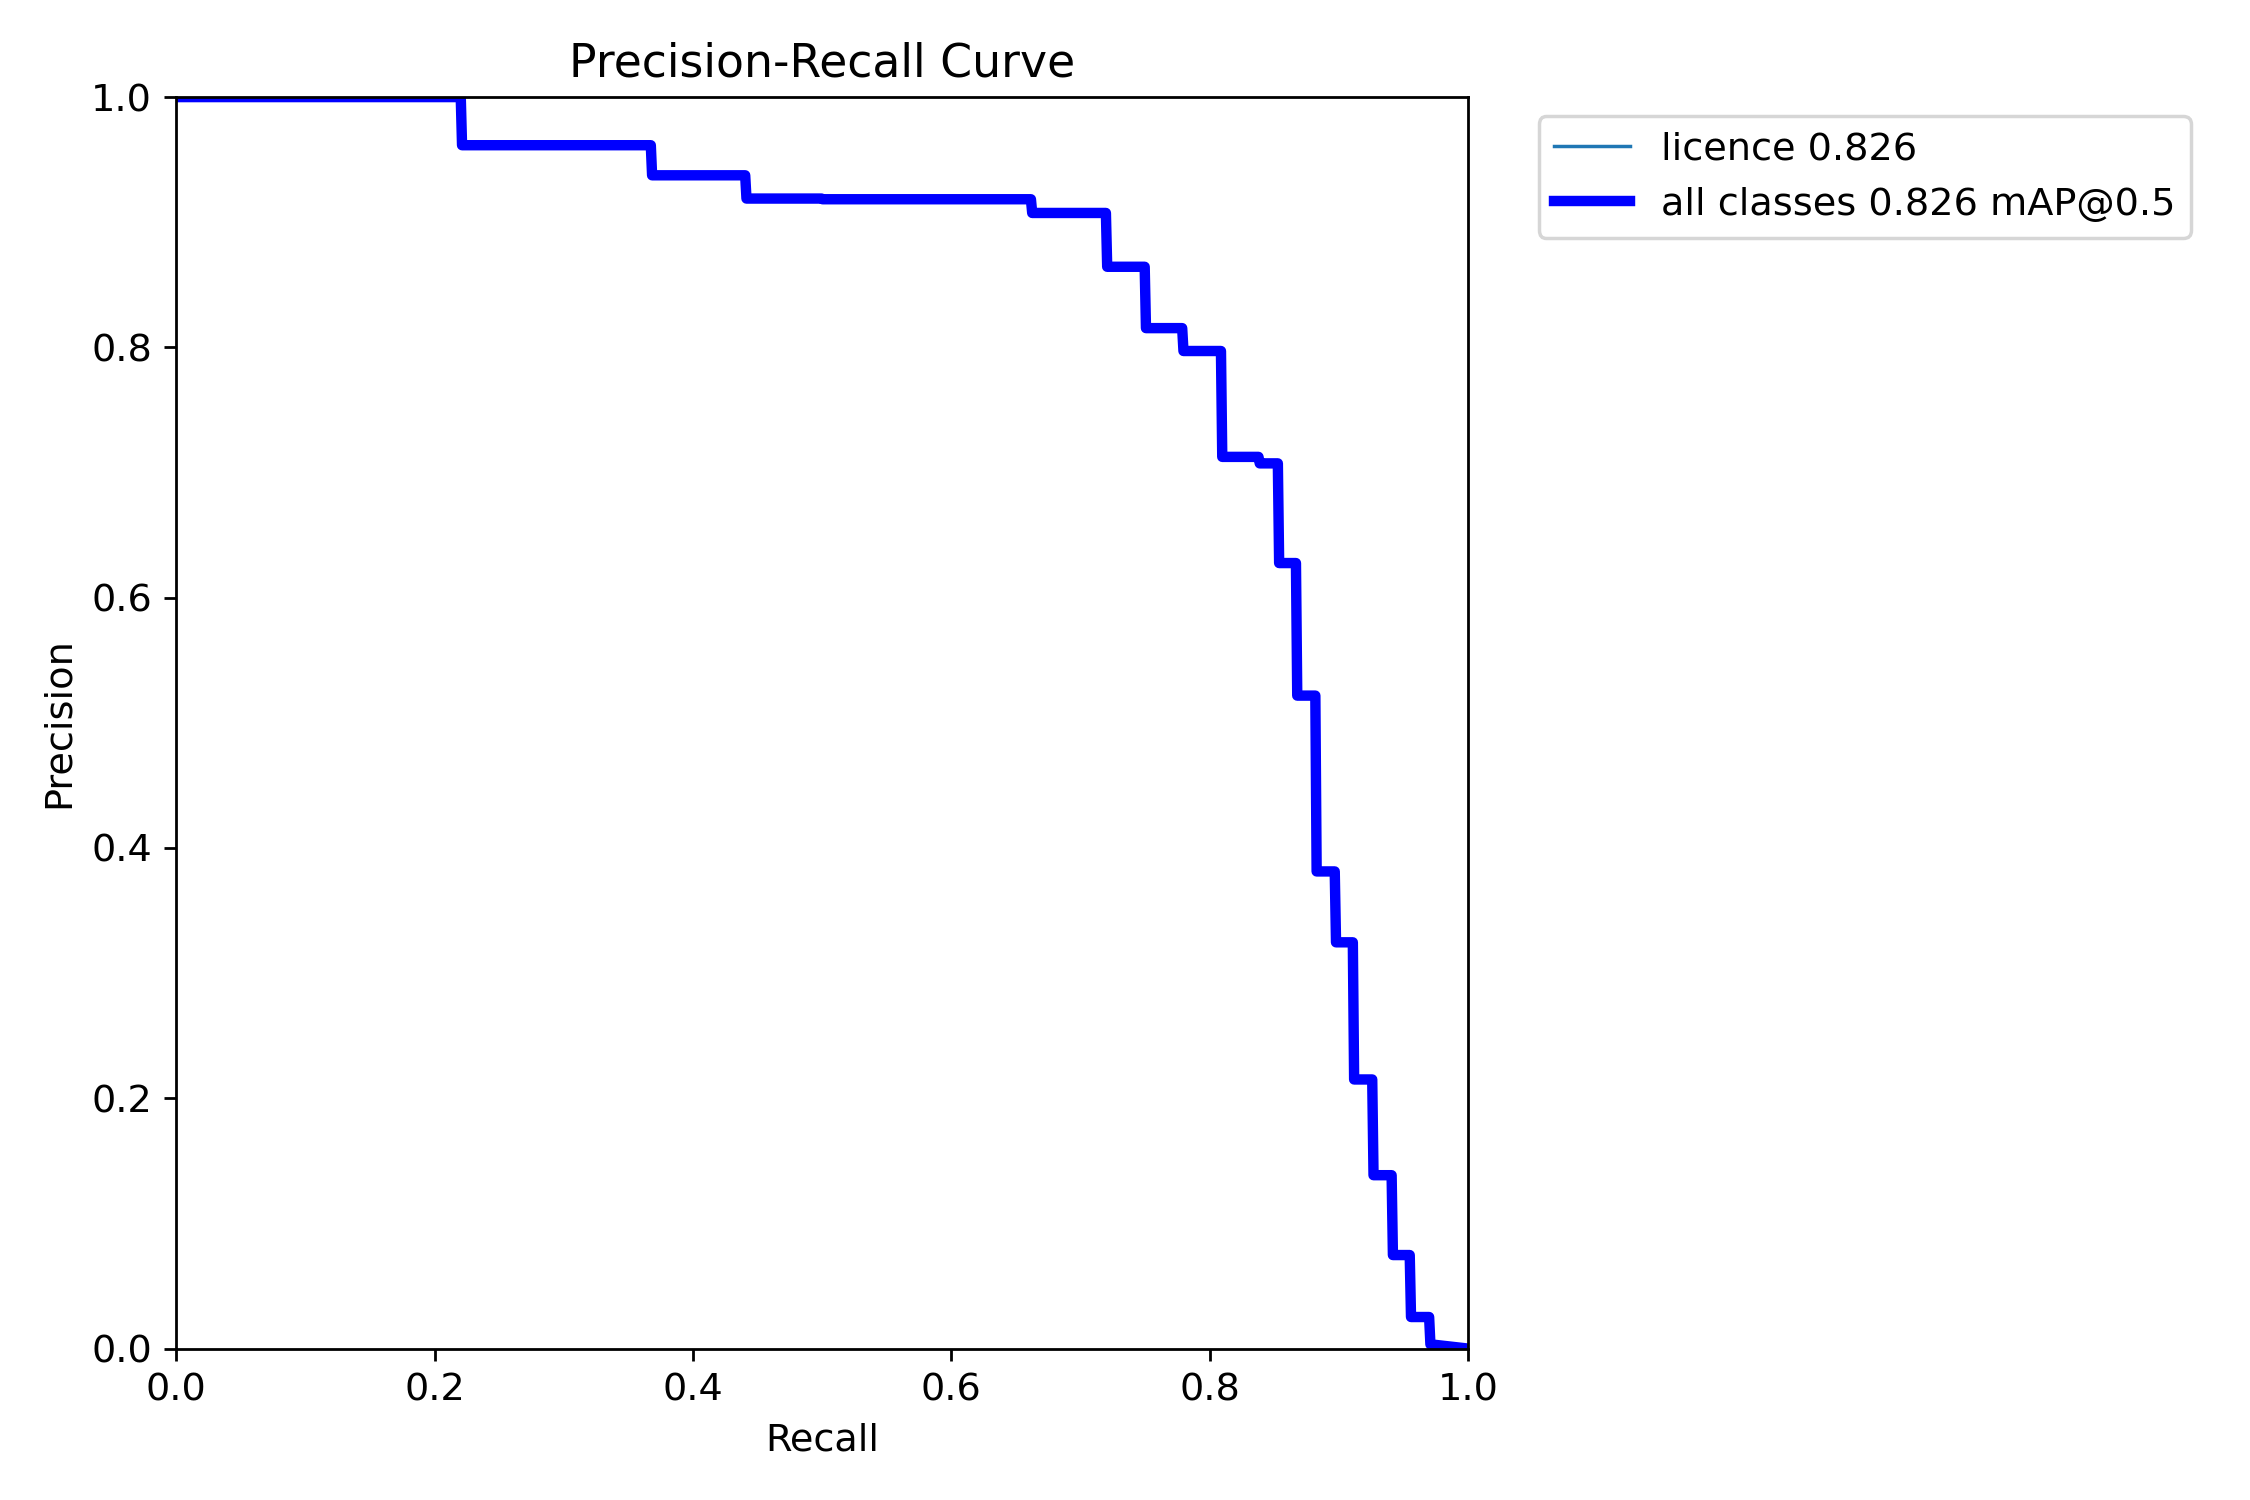

In [29]:
Image("/content/yolov10/runs/detect/train5/PR_curve.png")

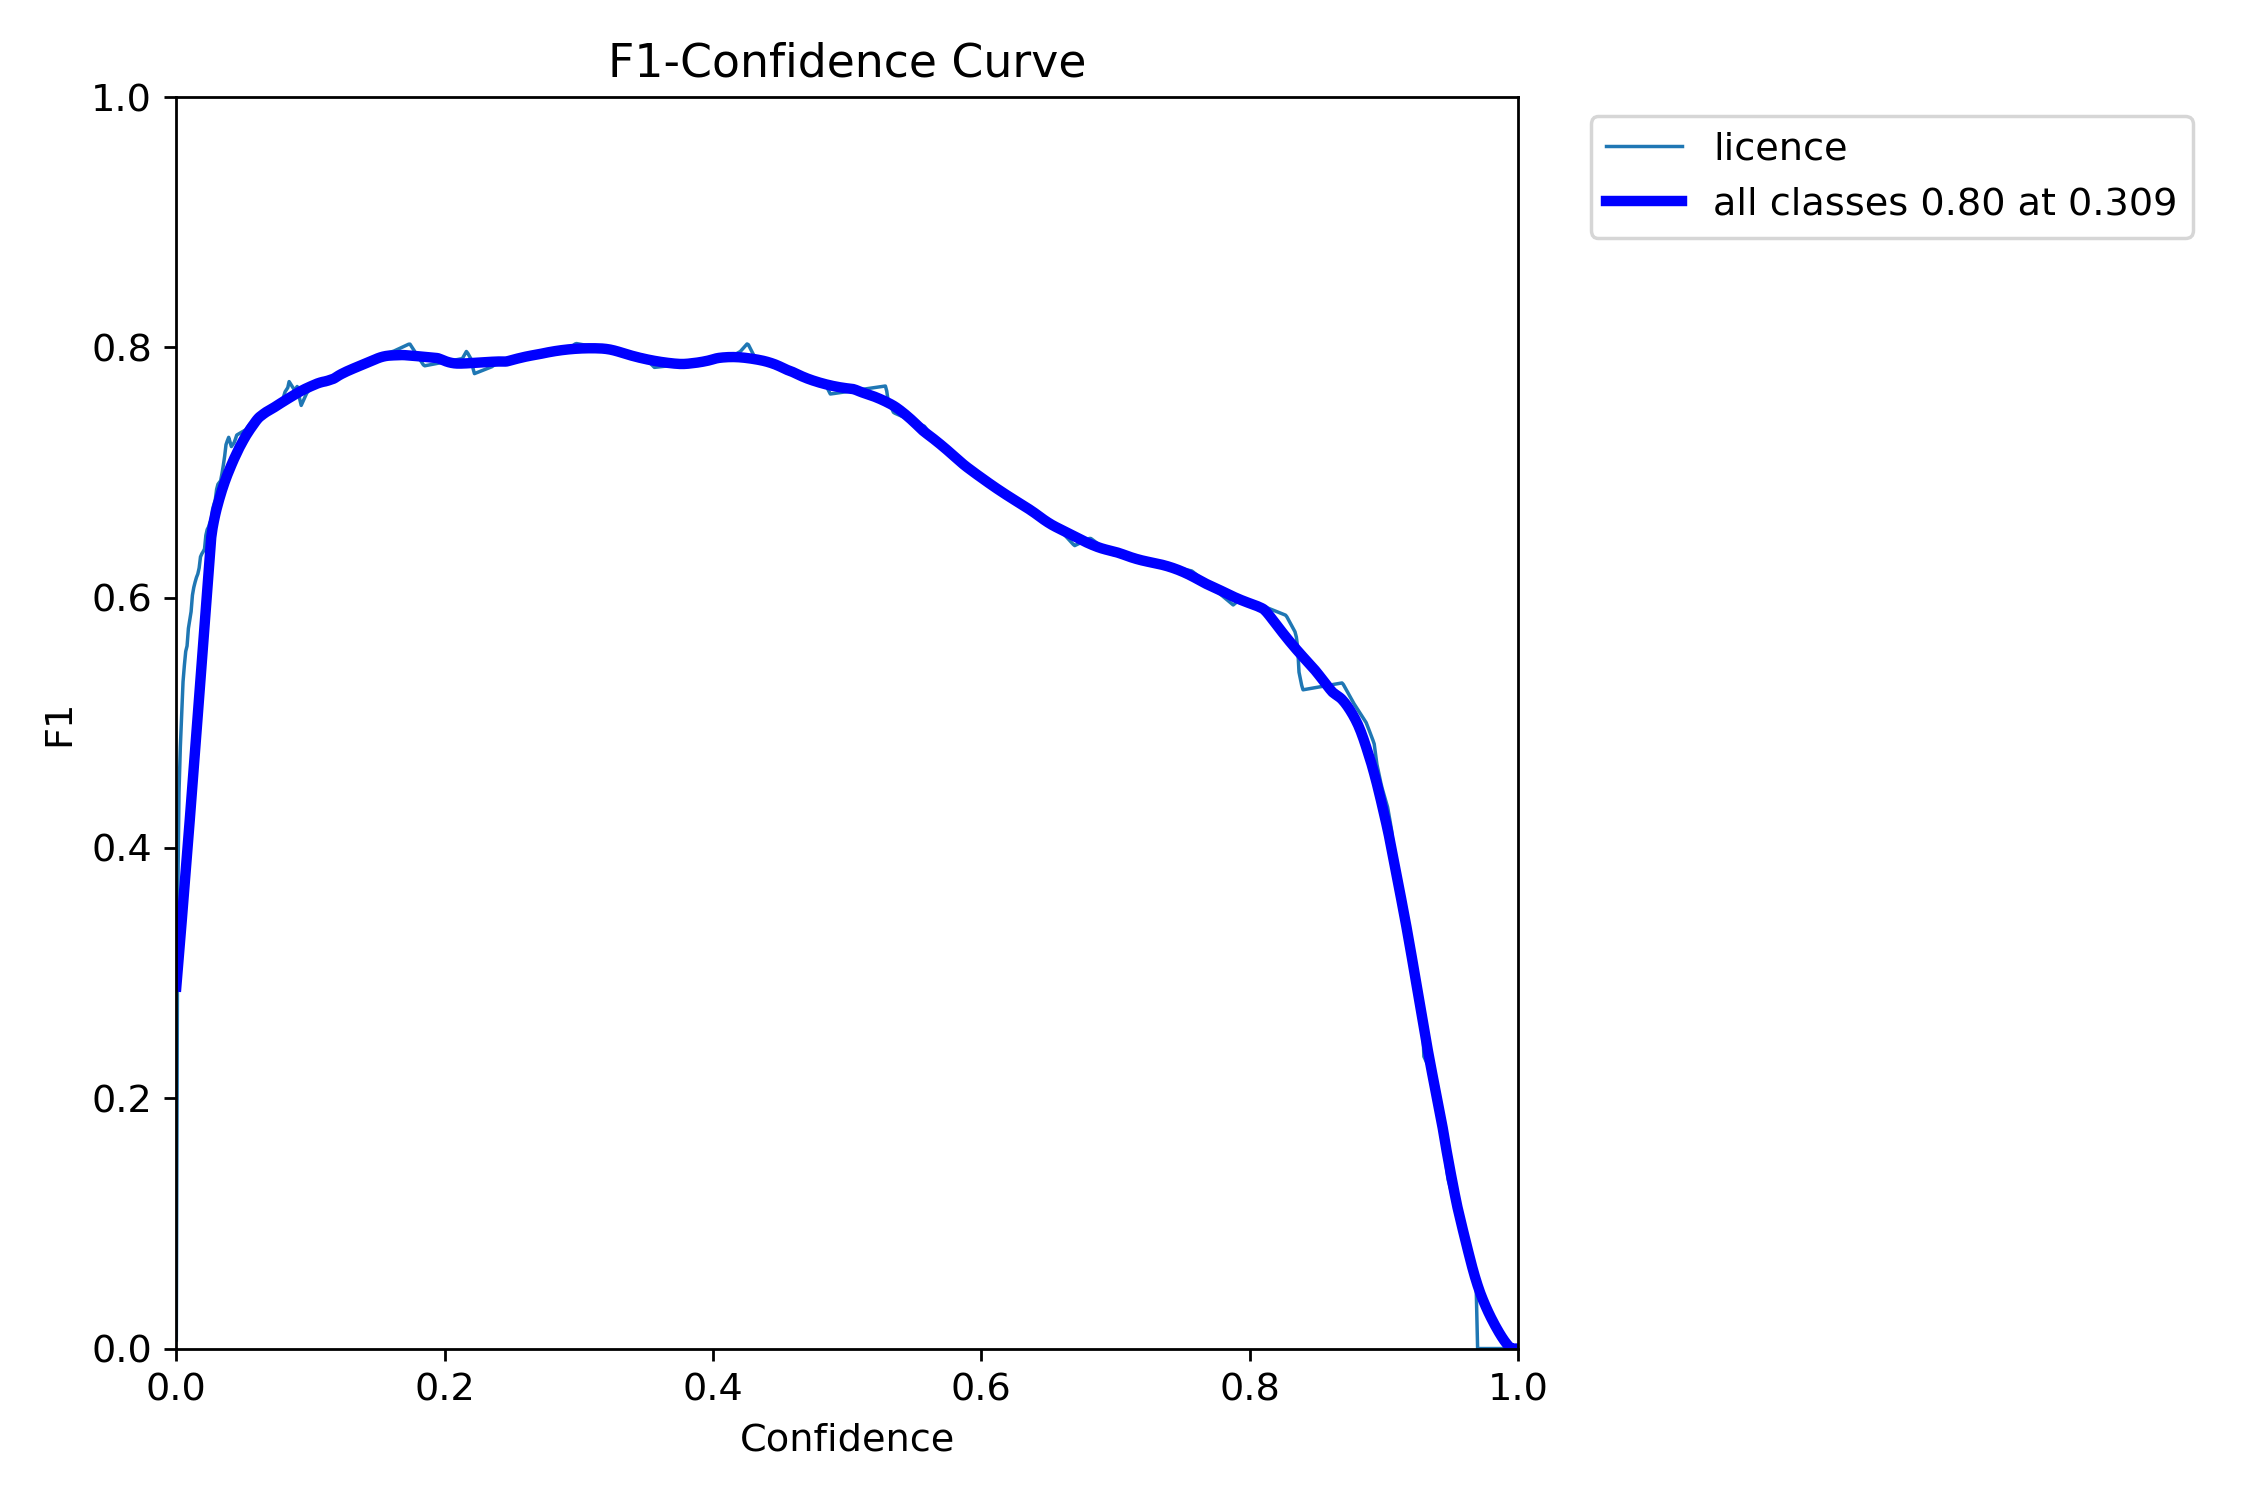

In [30]:

Image("/content/yolov10/runs/detect/train5/F1_curve.png")


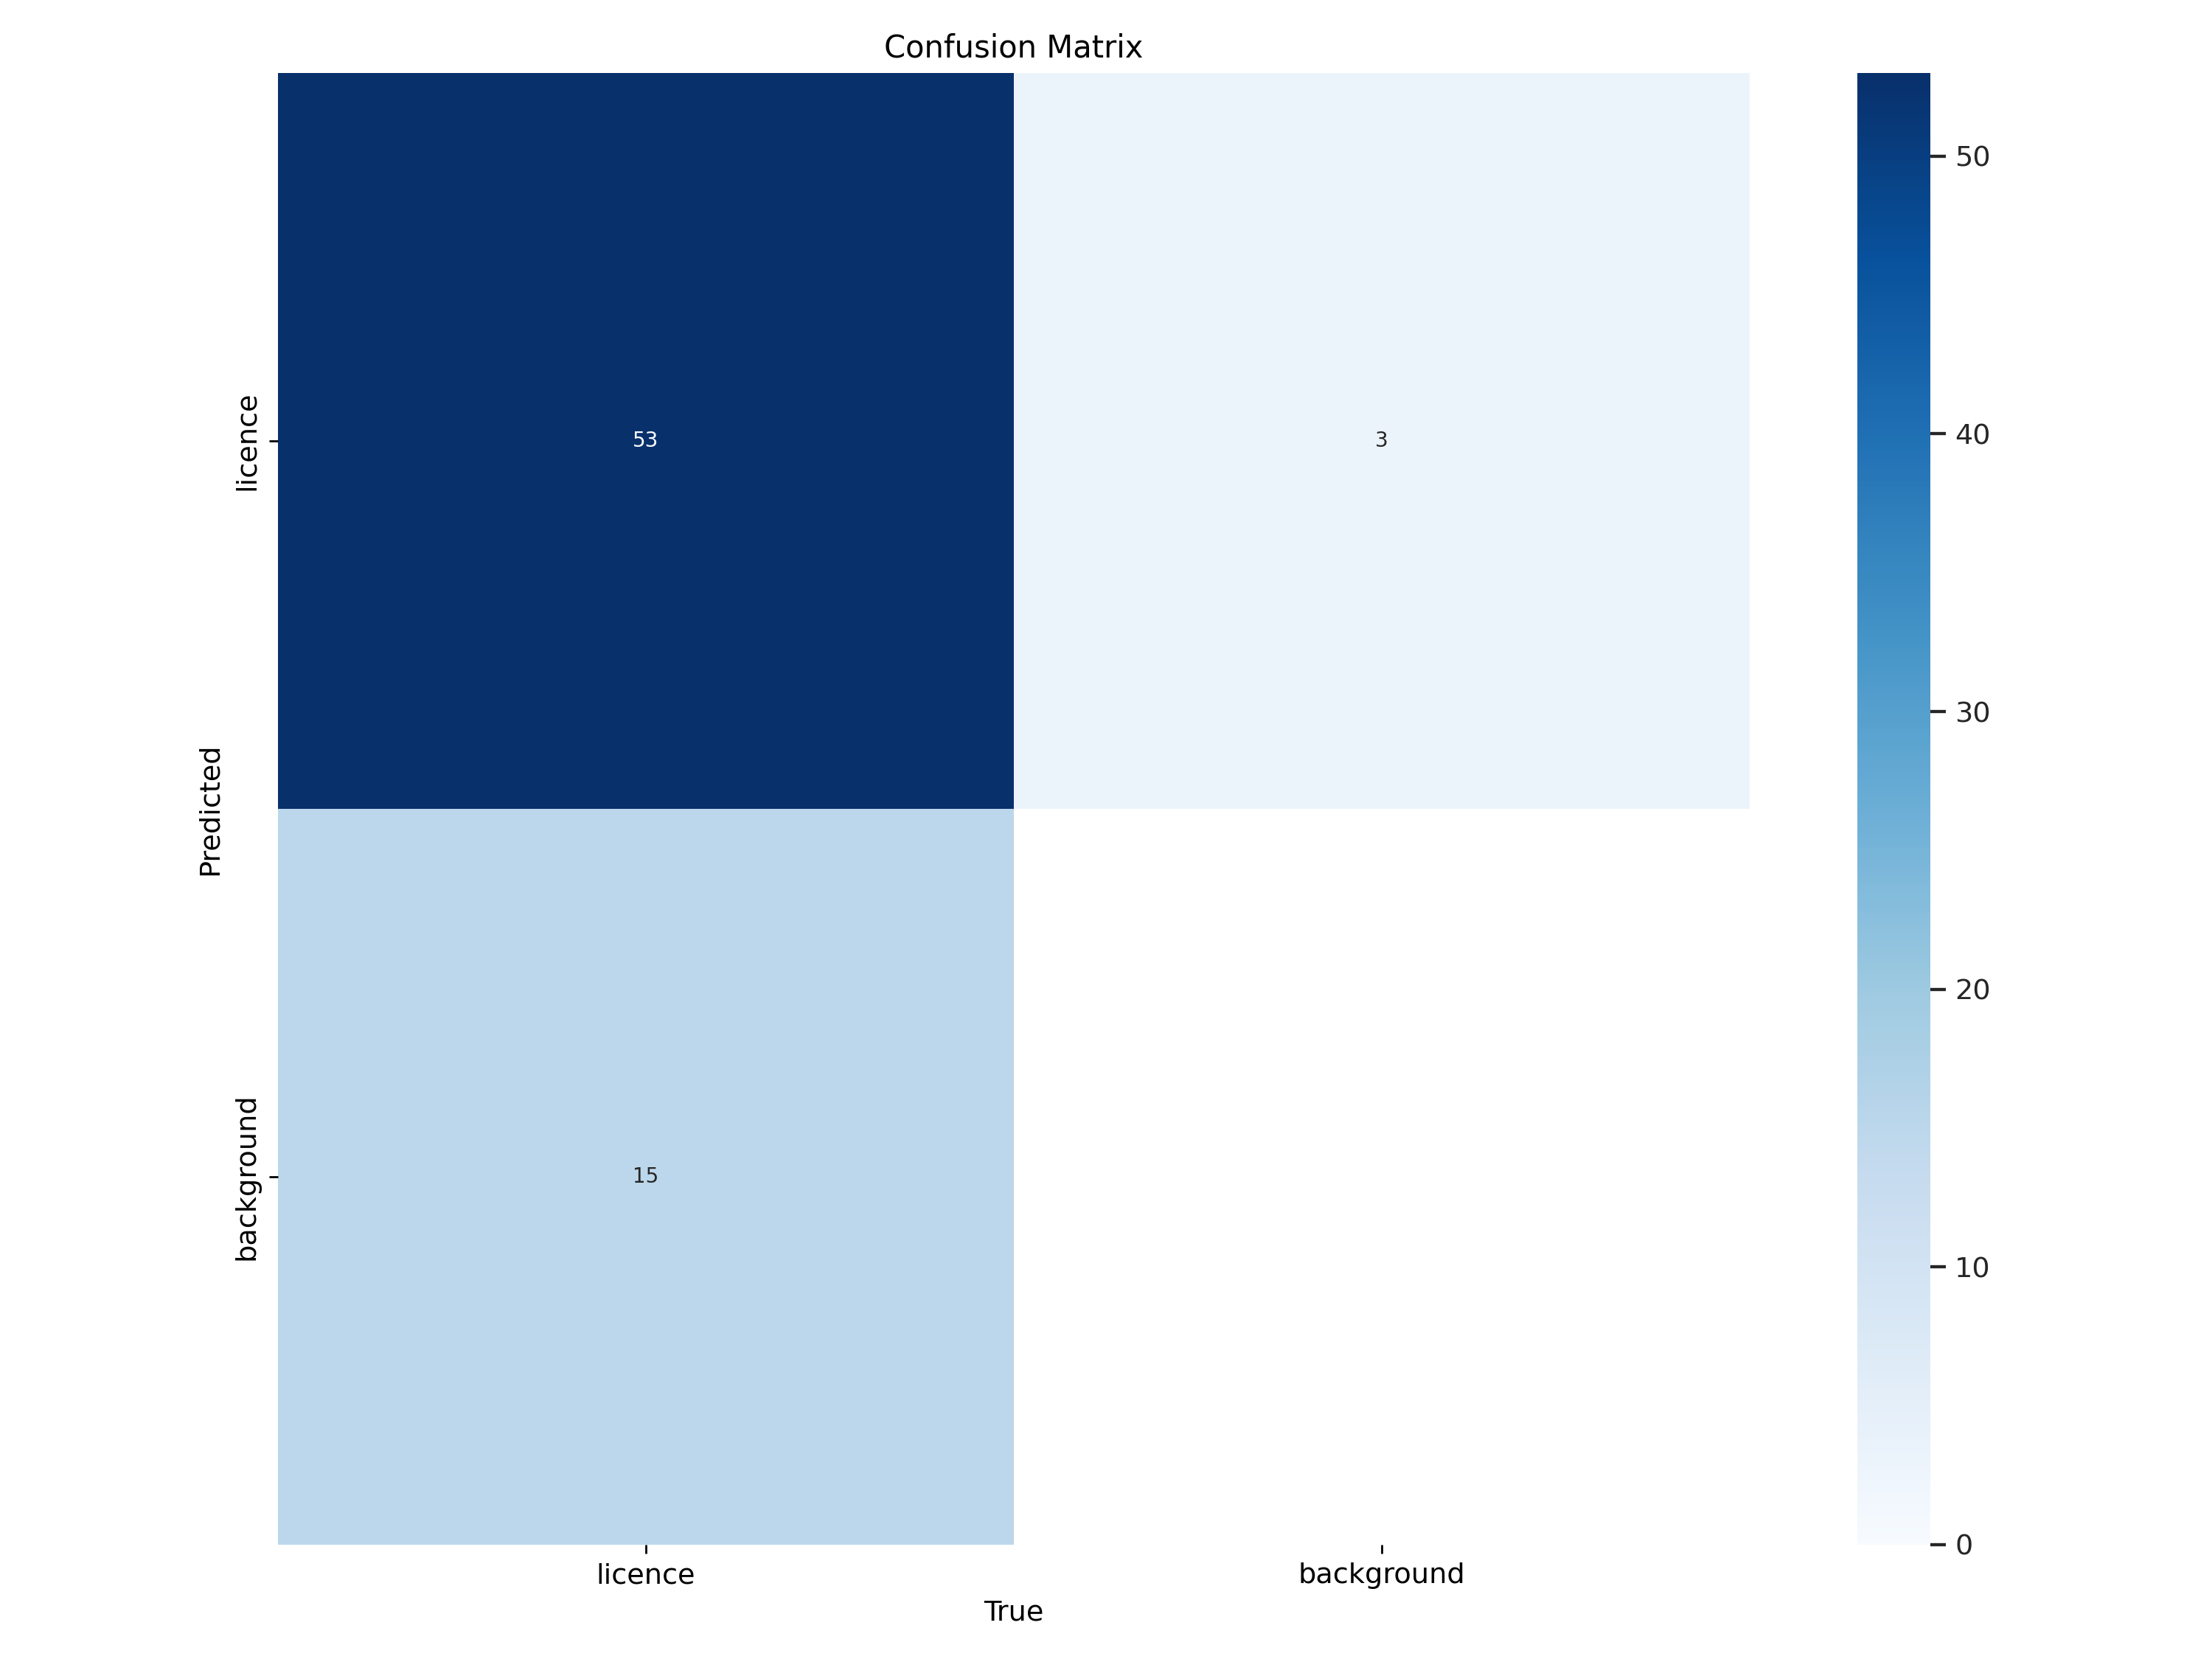

In [31]:
Image("/content/yolov10/runs/detect/train5/confusion_matrix.png")

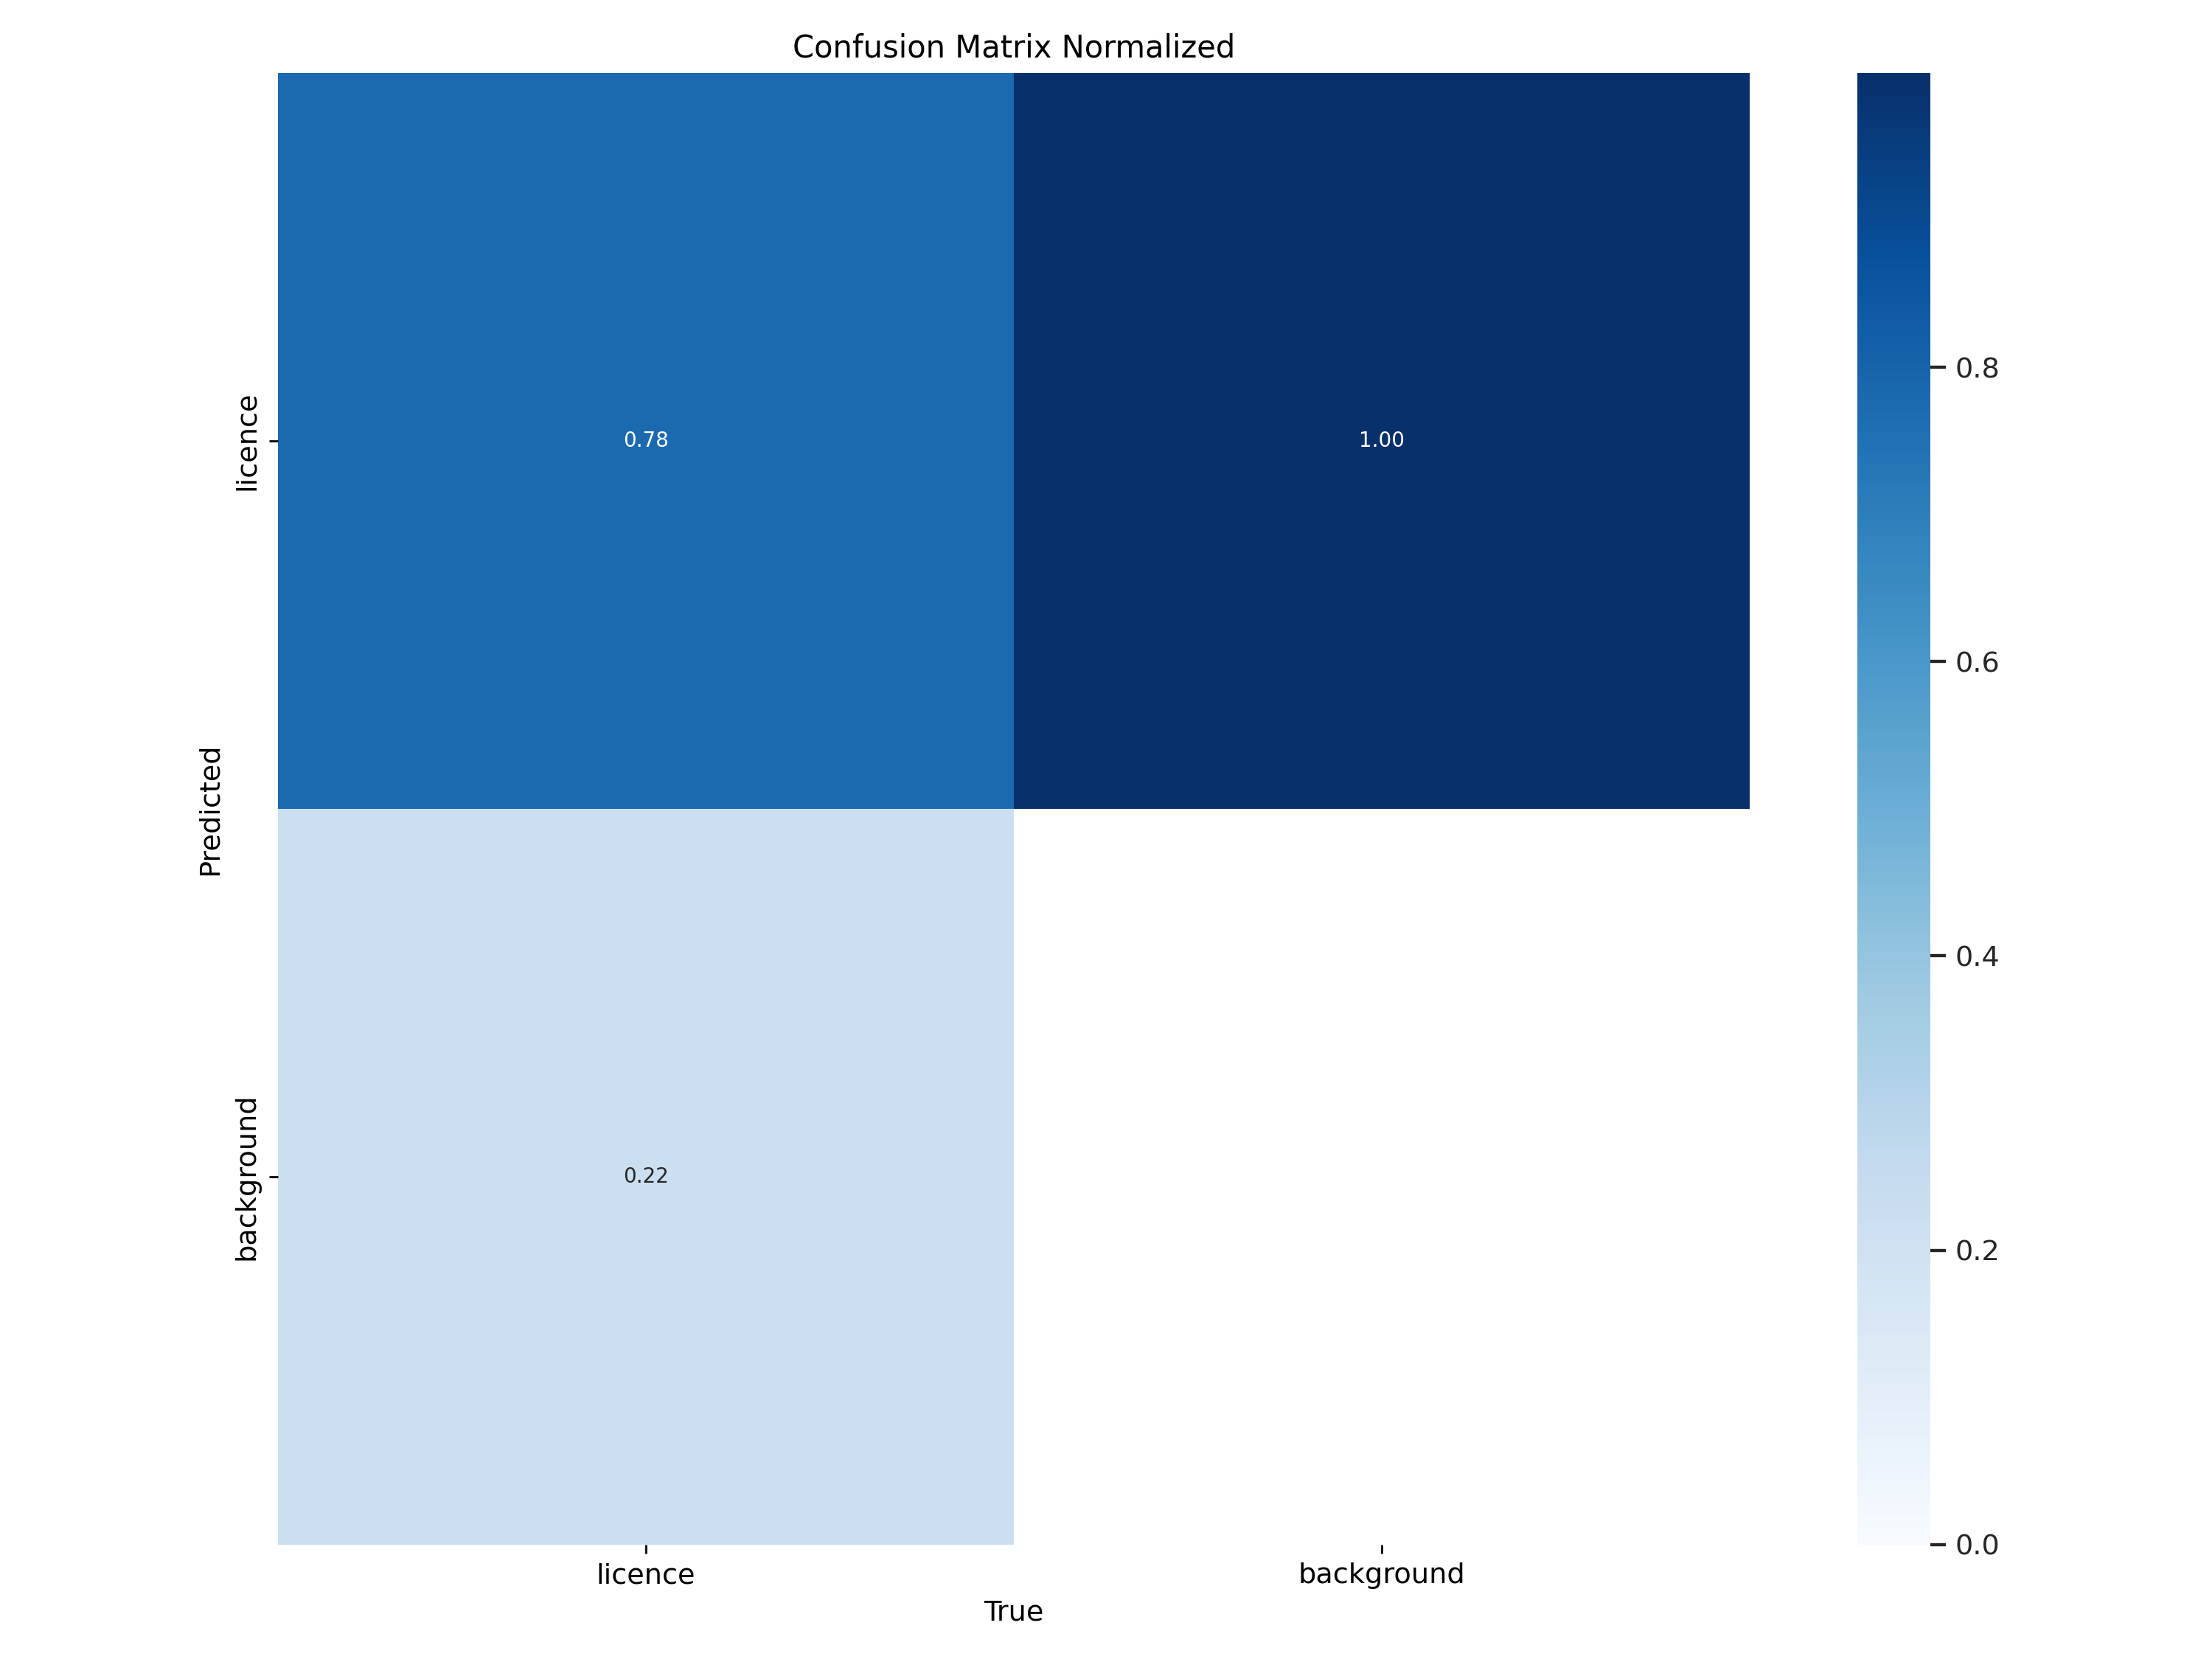

In [32]:
Image("/content/yolov10/runs/detect/train5/confusion_matrix_normalized.png")

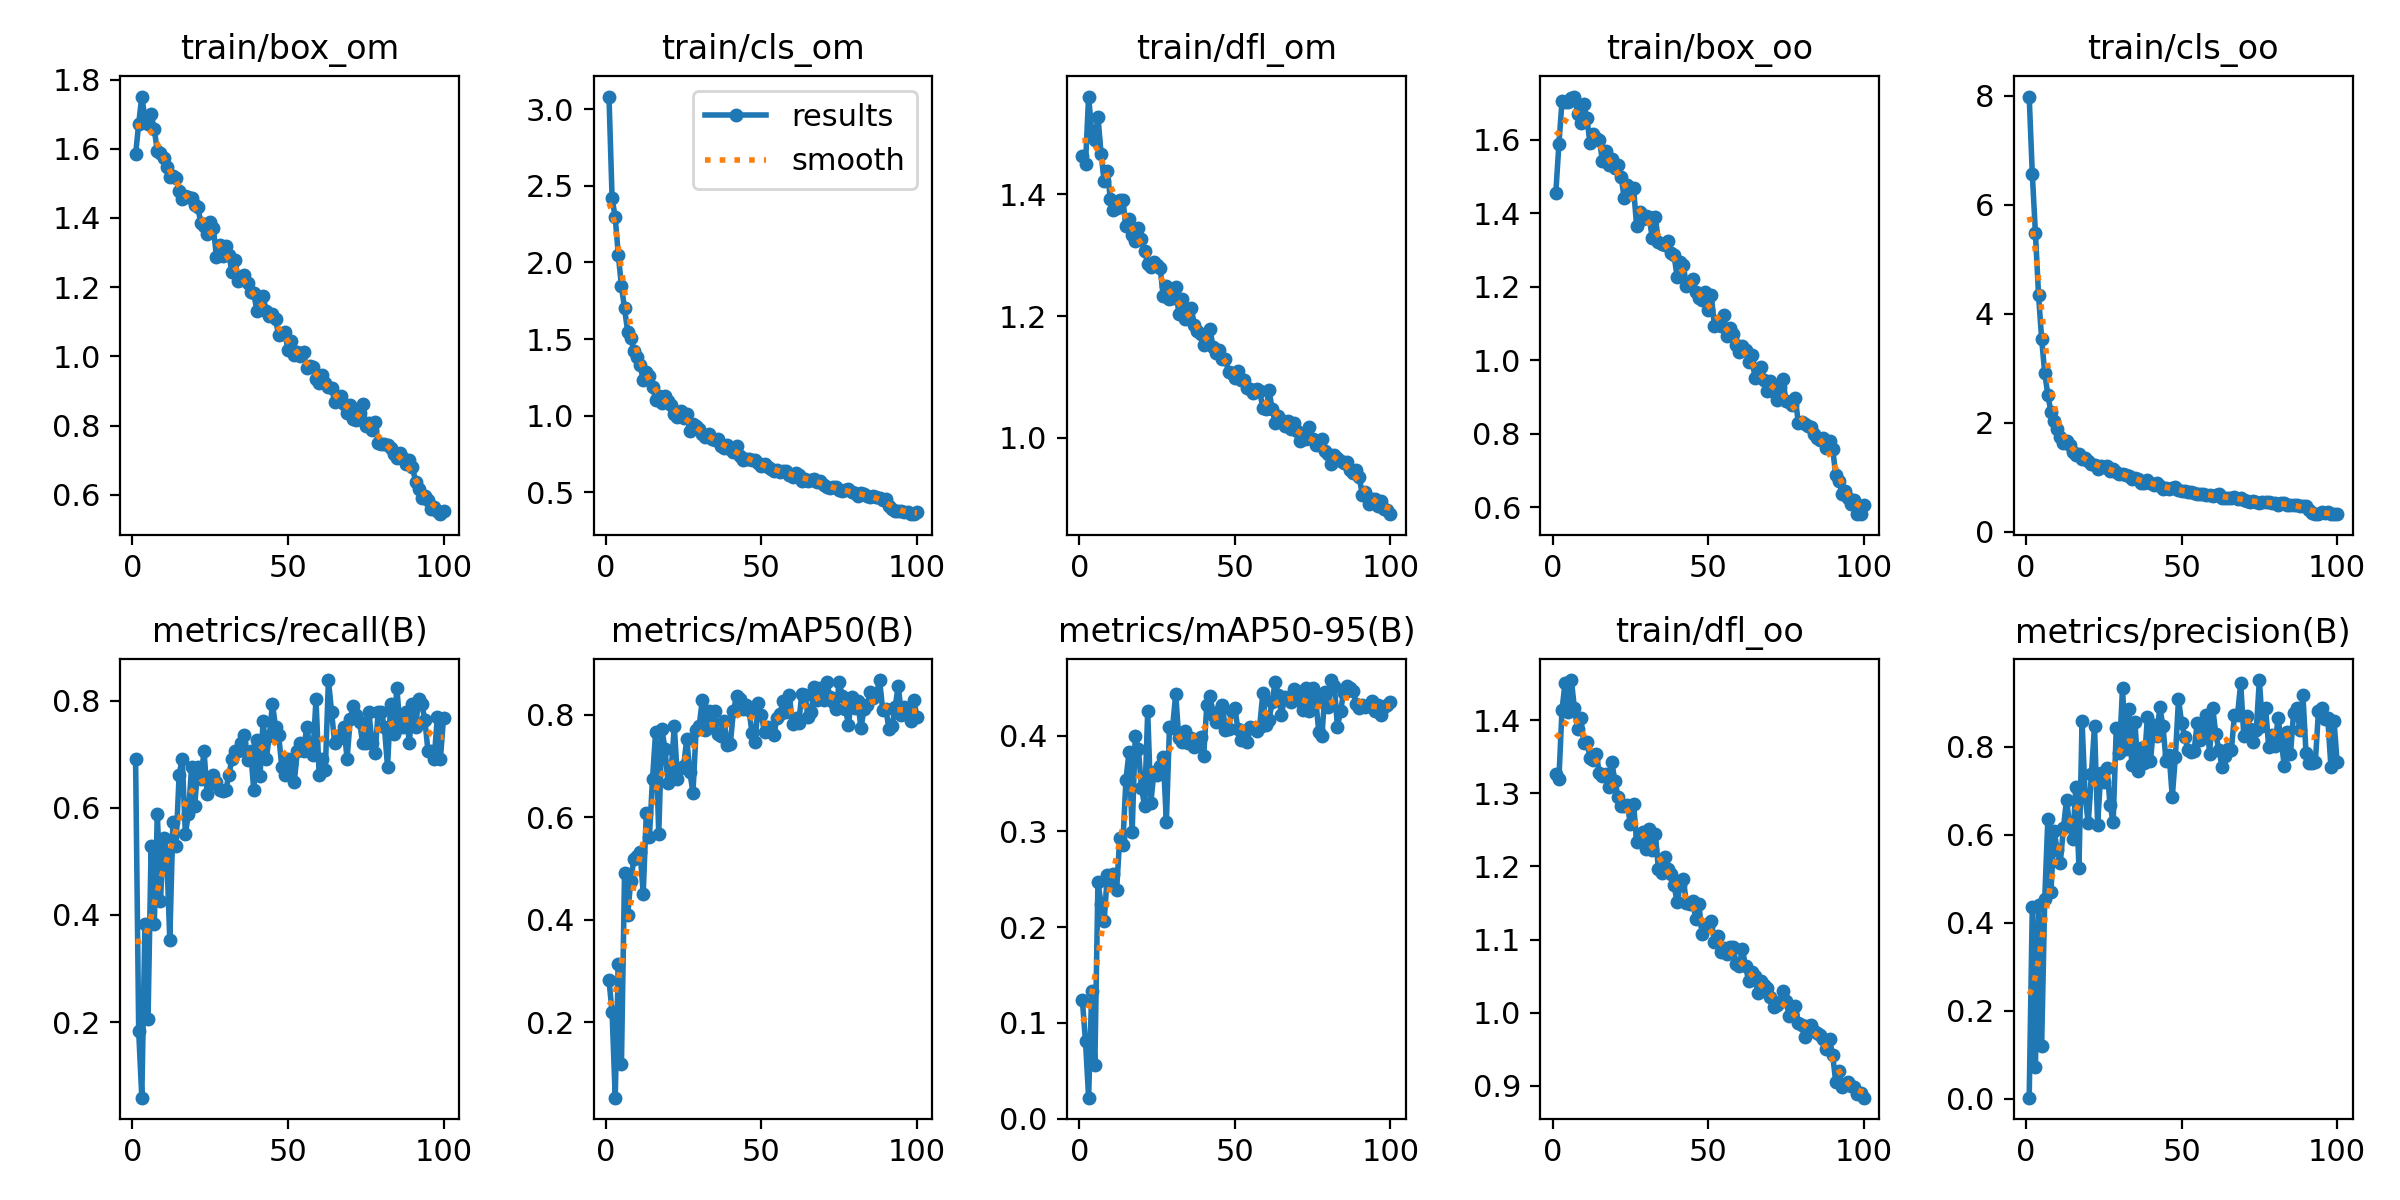

In [33]:


Image("/content/yolov10/runs/detect/train5/results.png")


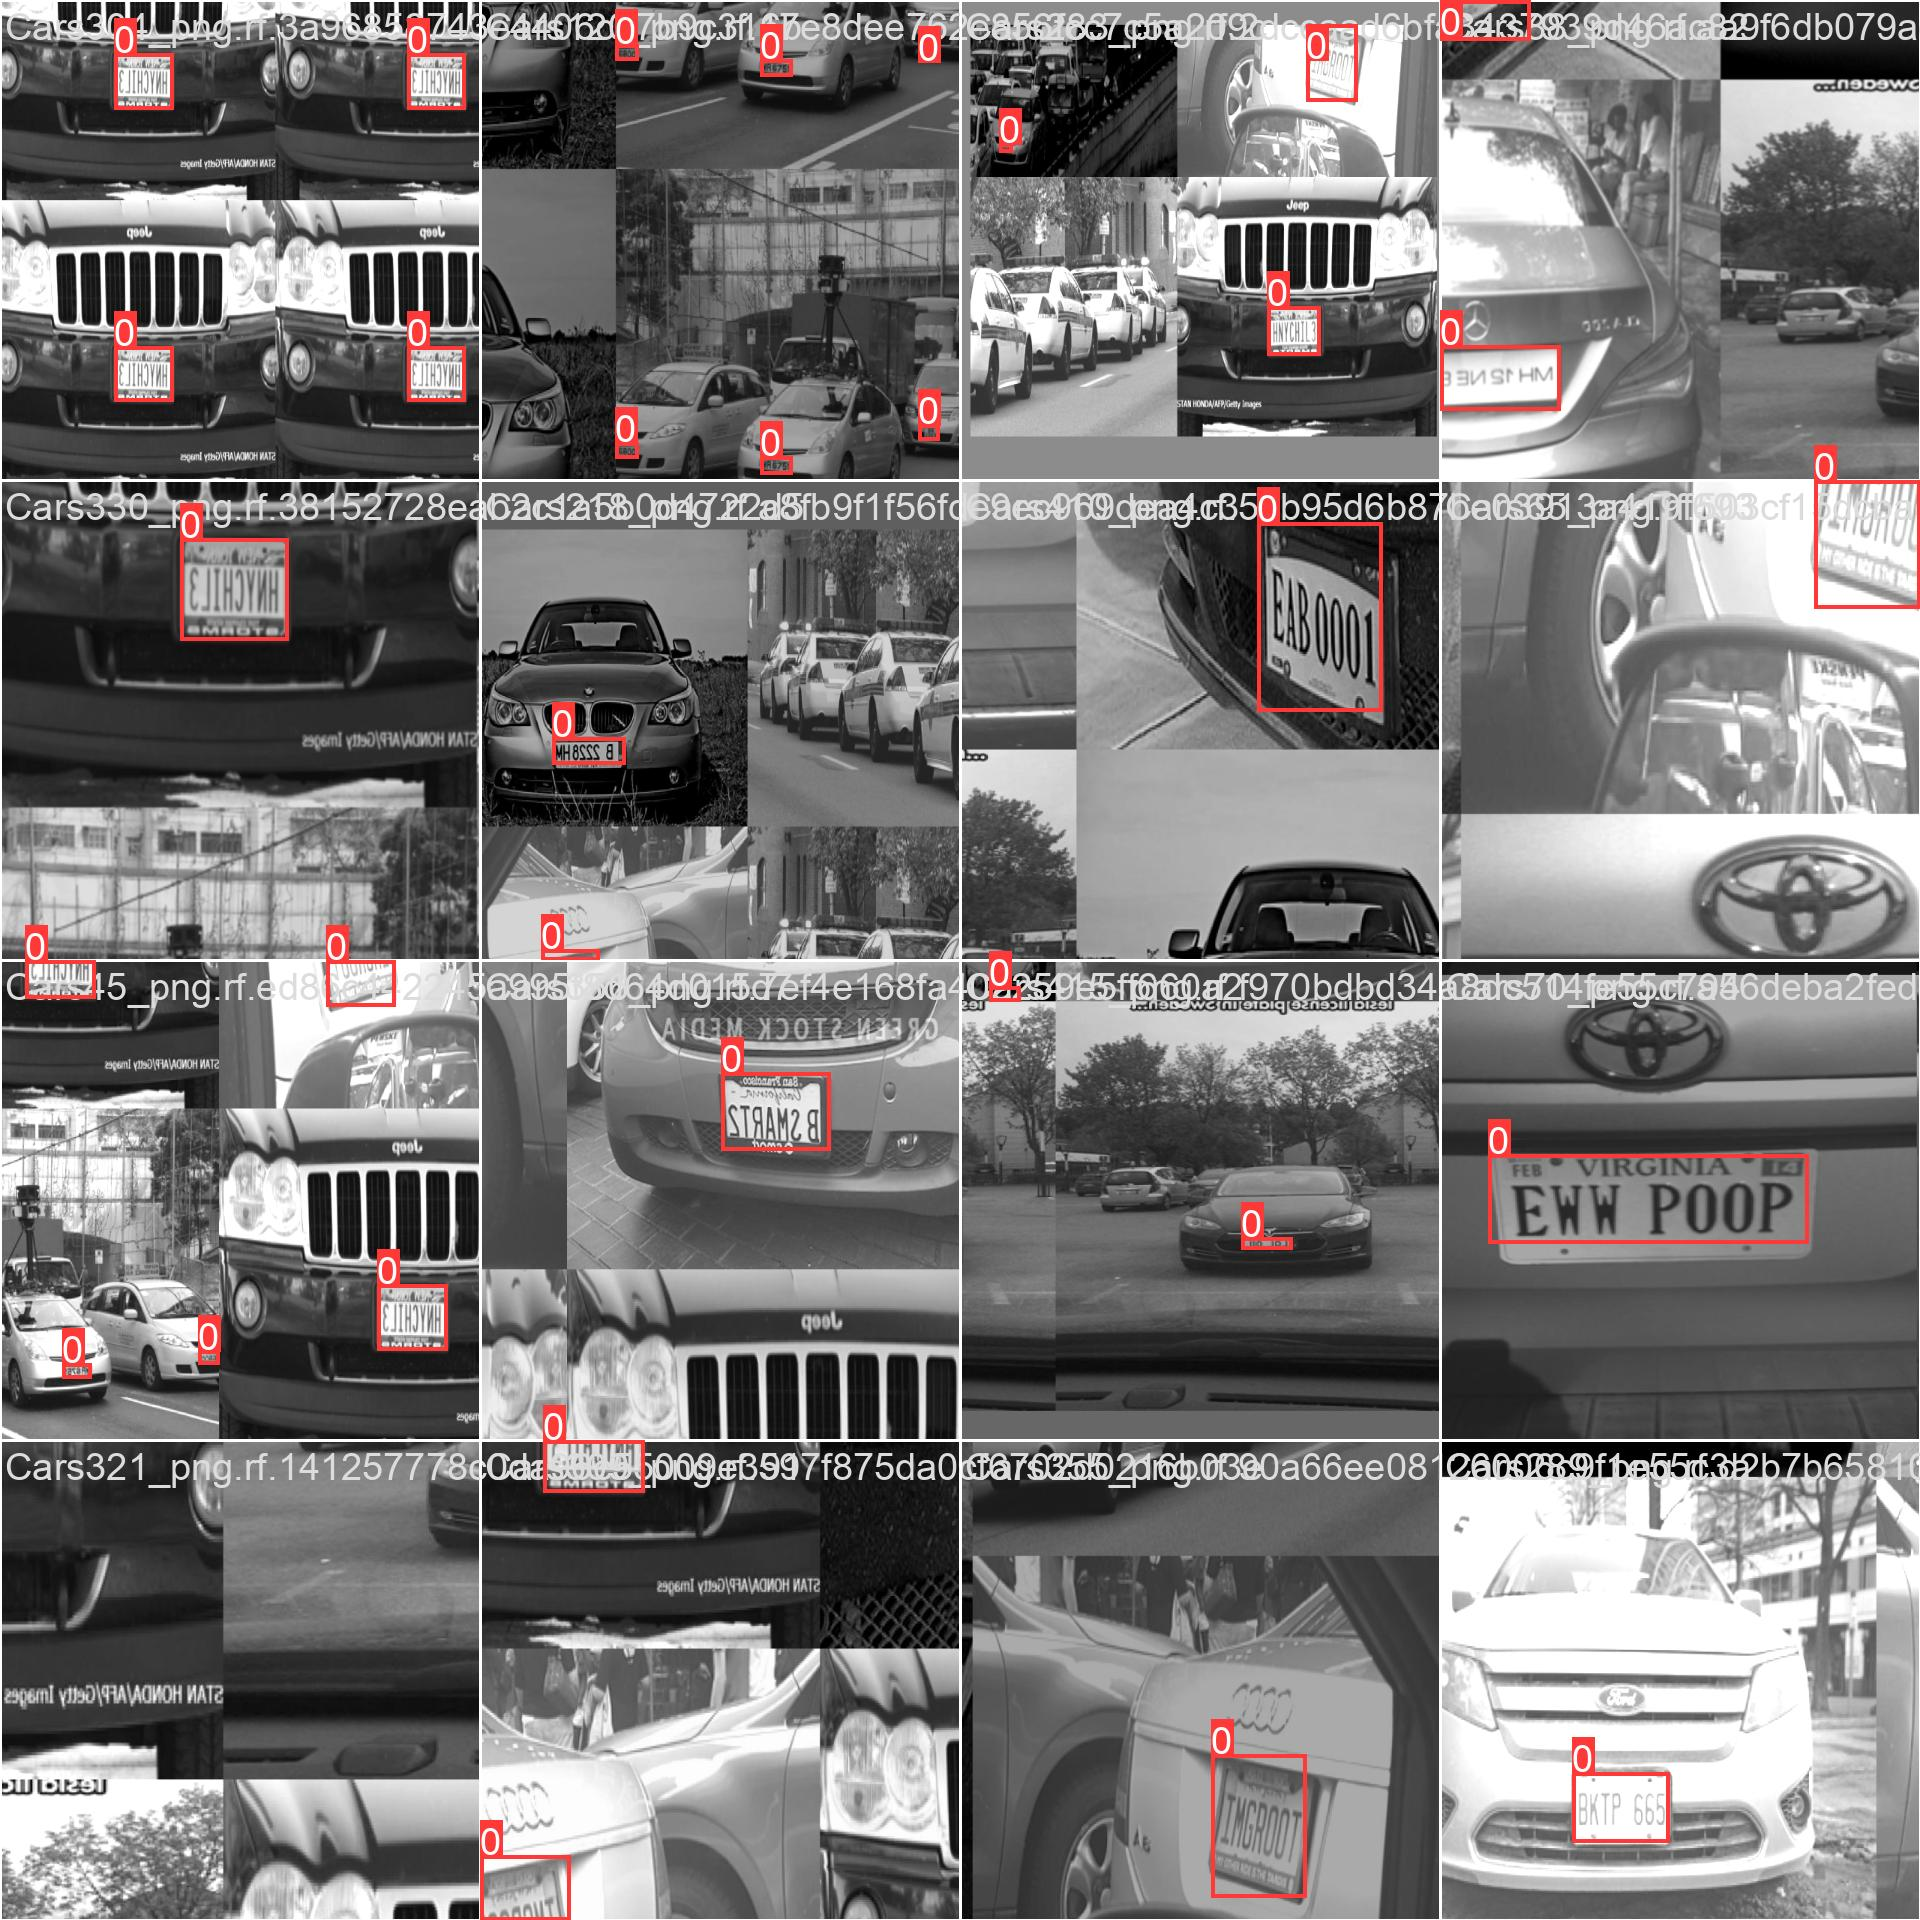

In [34]:

Image("/content/yolov10/runs/detect/train5/train_batch0.jpg")

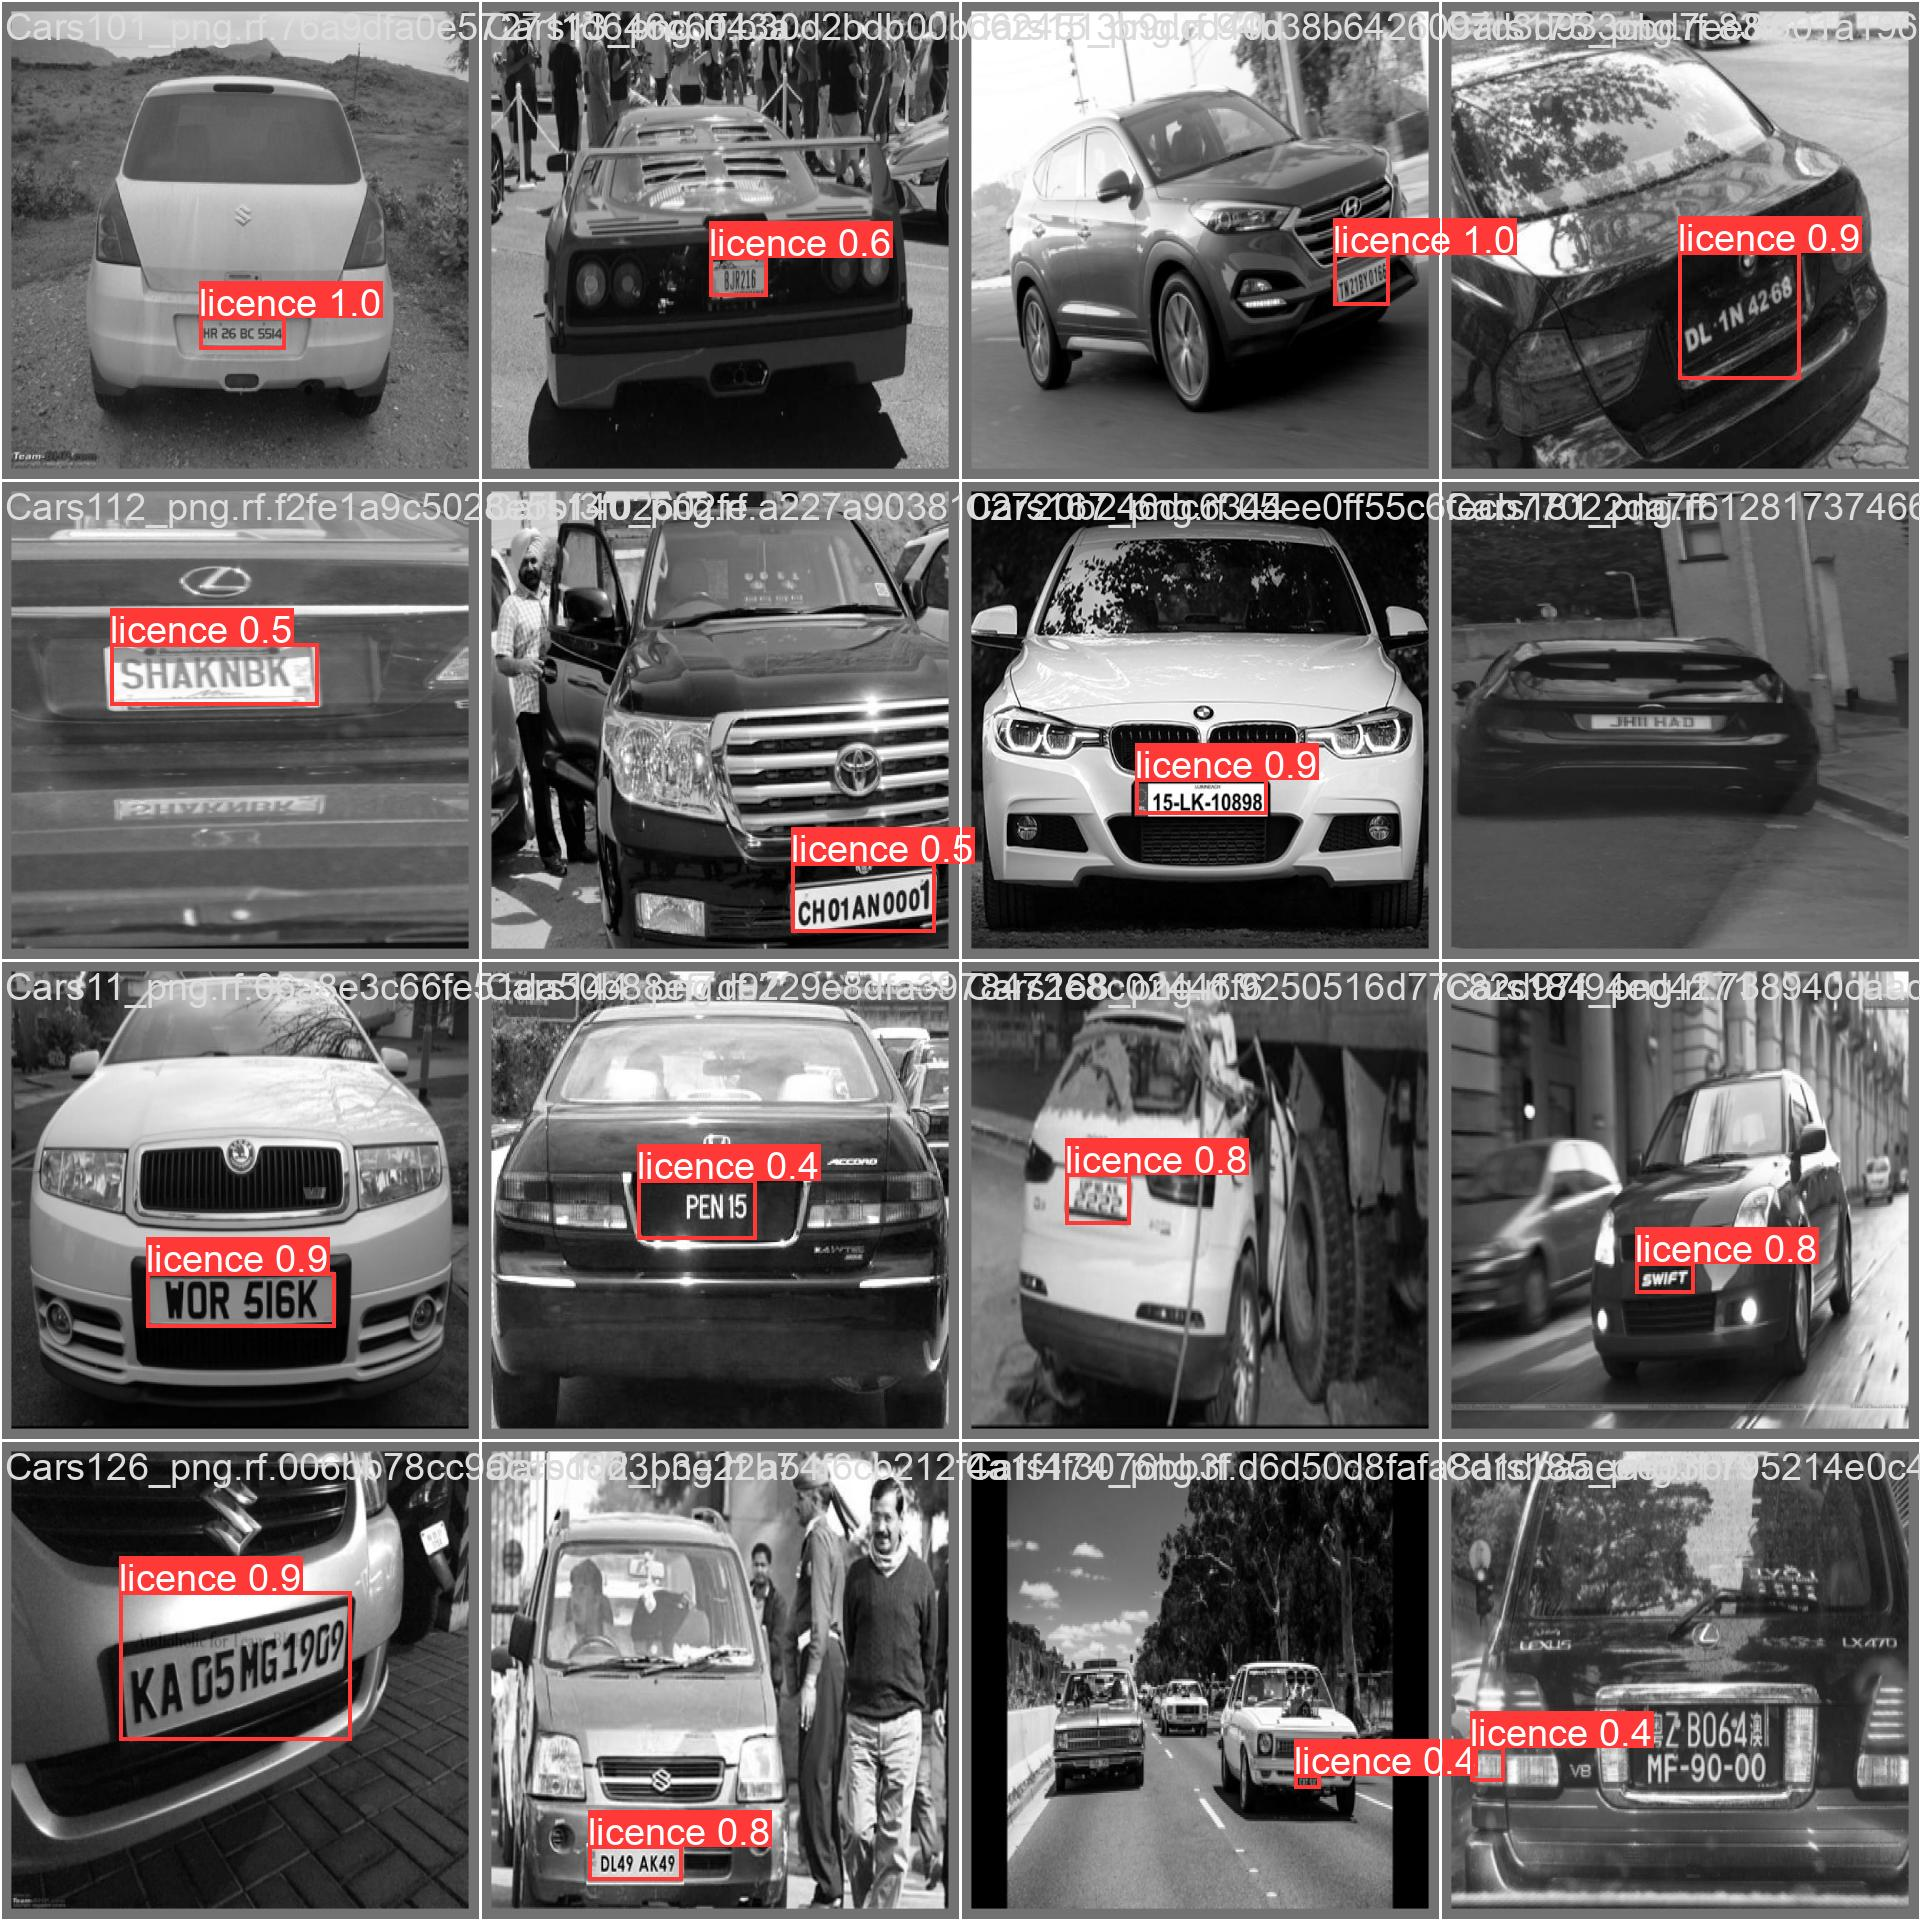

In [35]:


Image("/content/yolov10/runs/detect/train5/val_batch0_pred.jpg")

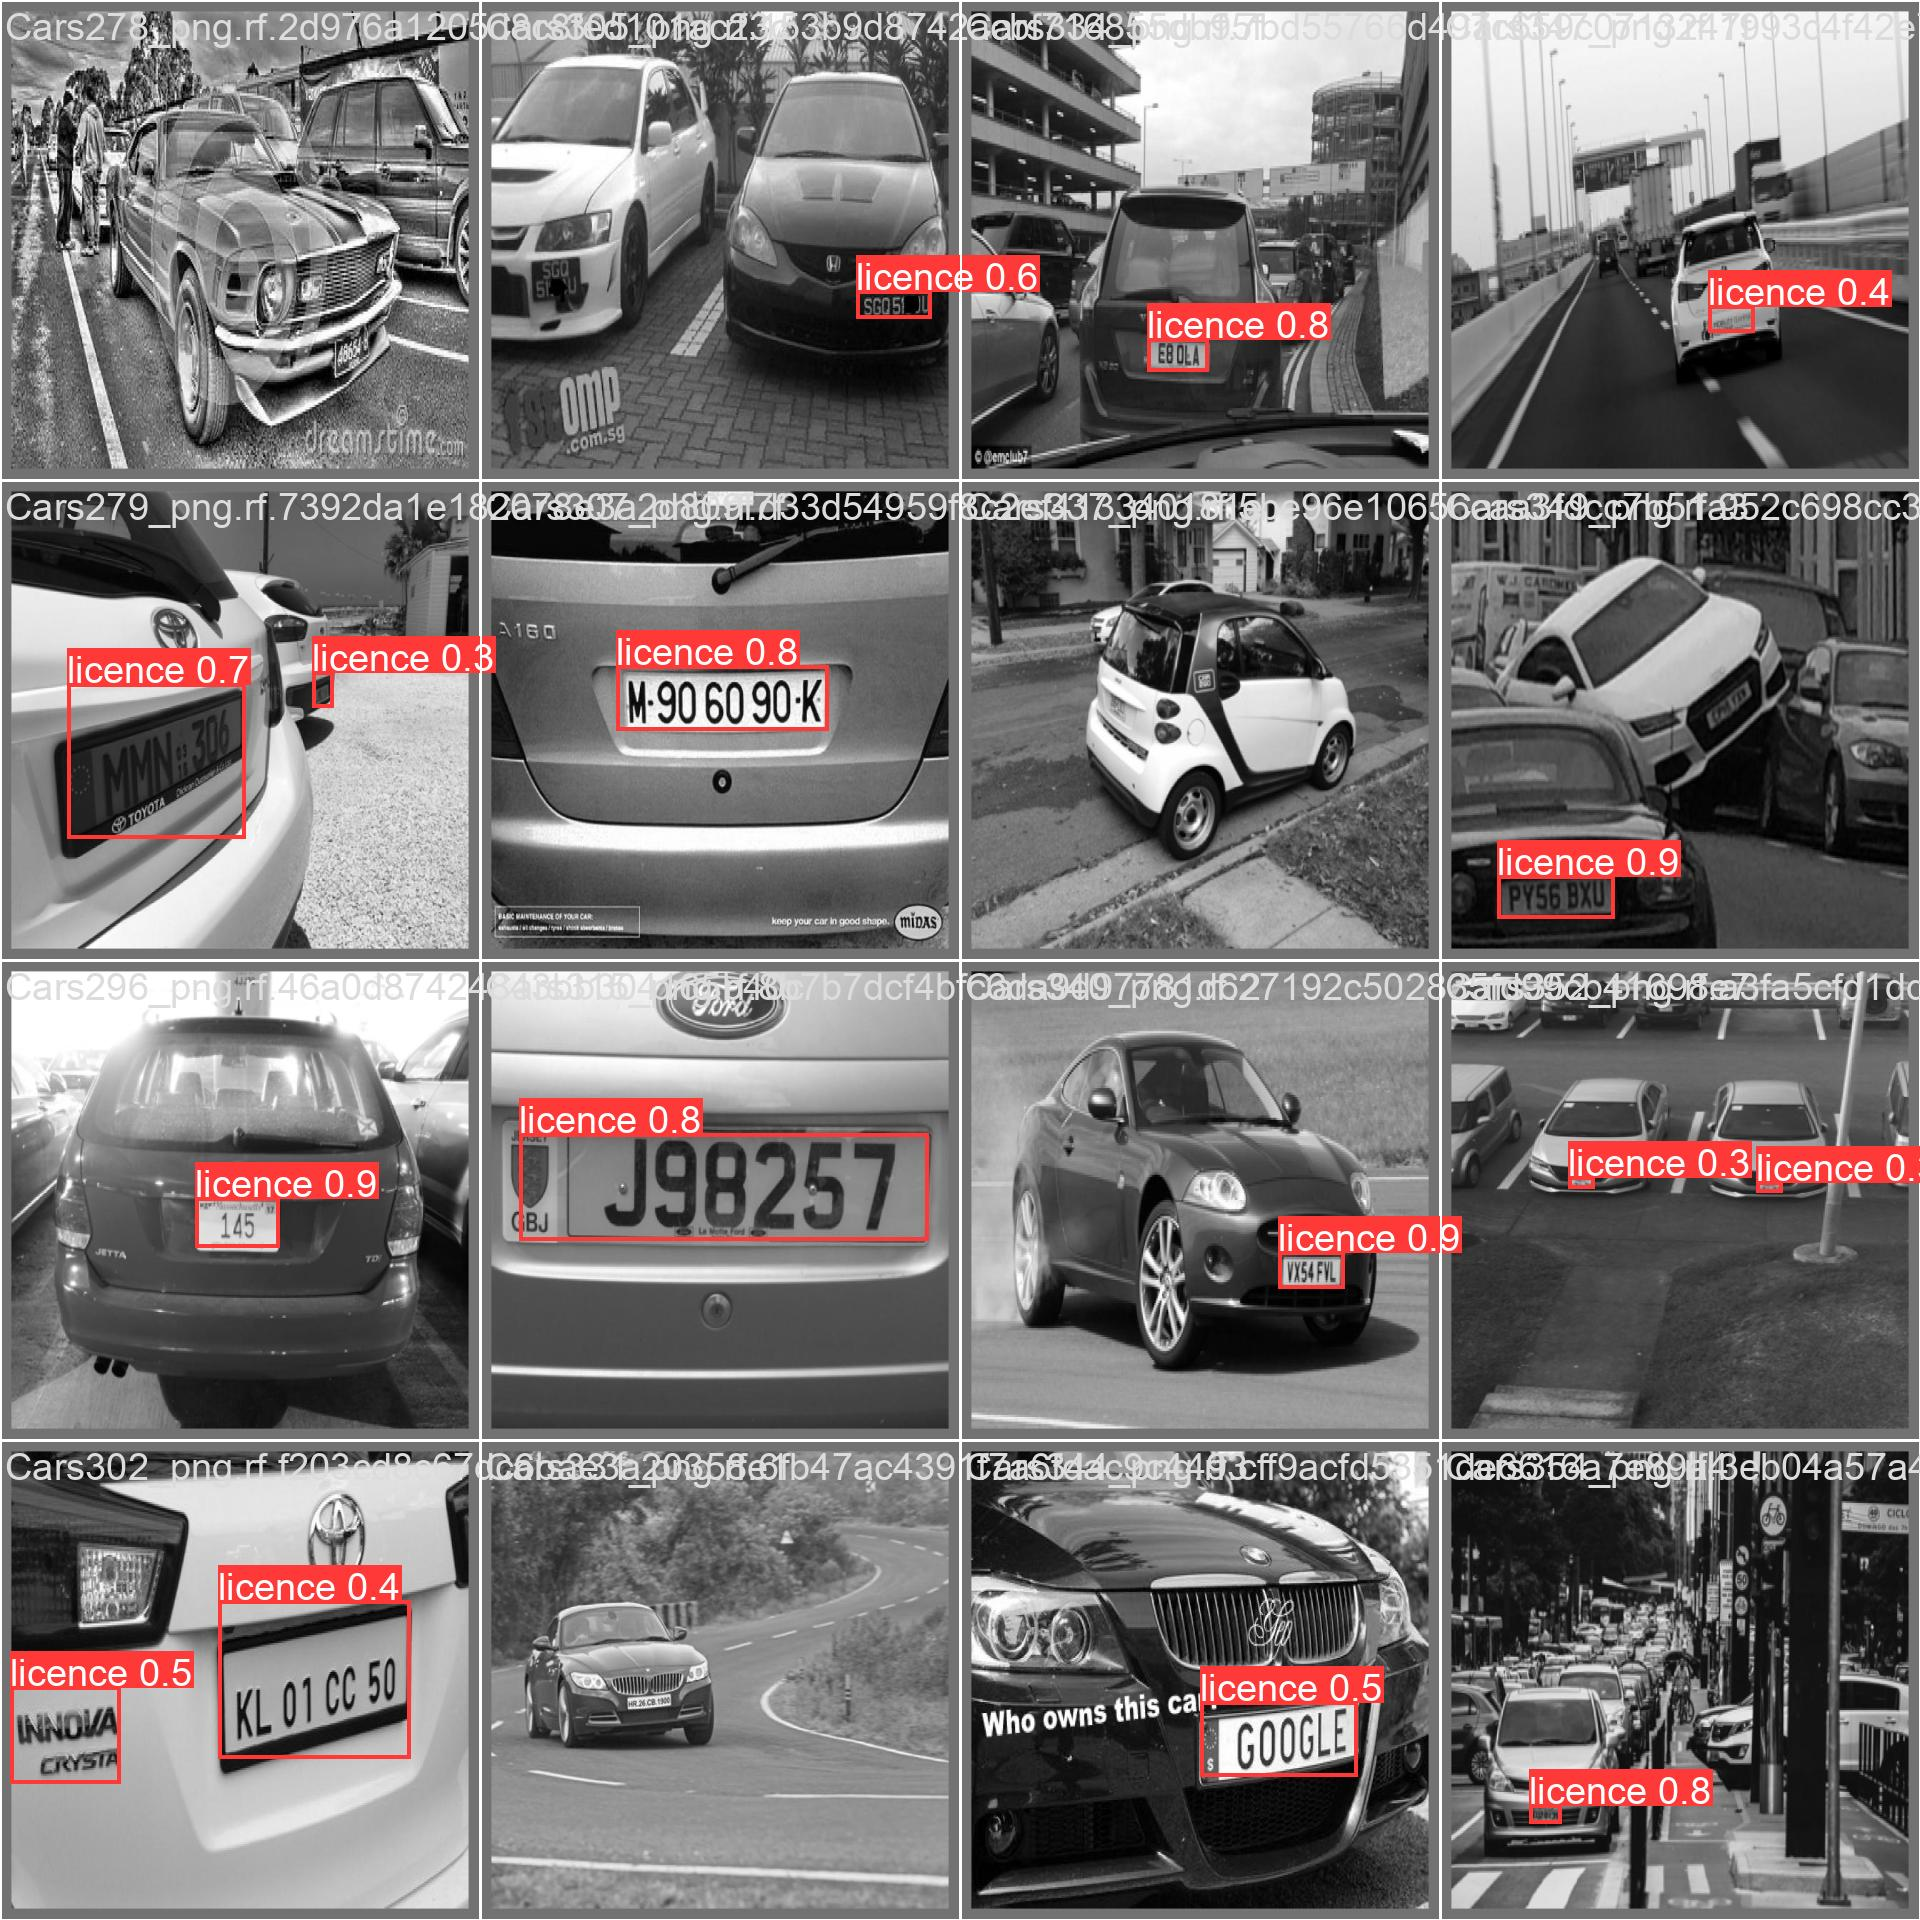

In [36]:


Image("/content/yolov10/runs/detect/train5/val_batch1_pred.jpg")

In [37]:
!gdown "https://drive.google.com/uc?id=132Wdk5jptRfgNoav8vePYk9chBwiDHDc&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=132Wdk5jptRfgNoav8vePYk9chBwiDHDc&confirm=t
To: /content/yolov10/best.pt
100% 5.77M/5.77M [00:00<00:00, 23.5MB/s]


In [38]:
!gdown "https://drive.google.com/uc?id=15wQmUQu4YnsinJswkDe7zr1QU5Ulue9O&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=15wQmUQu4YnsinJswkDe7zr1QU5Ulue9O&confirm=t
To: /content/yolov10/carImage1.png
100% 358k/358k [00:00<00:00, 5.06MB/s]


In [39]:
!yolo task=detect mode=predict conf=0.25 save=True model='best.pt' source='carImage1.png'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

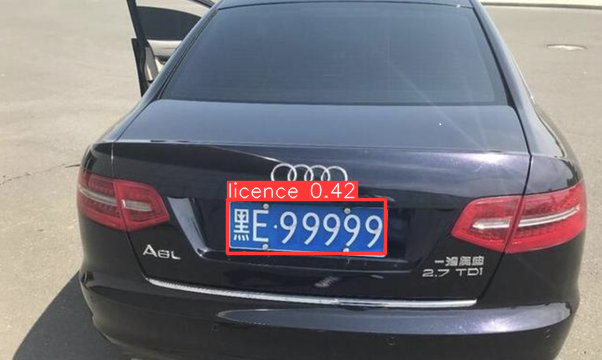

In [40]:
from IPython.display import Image
Image(filename='runs/detect/predict/carImage1.png')

In [41]:
!gdown "https://drive.google.com/uc?id=12X-xluoK8zK36F6mudICff2ZjgpQ6Qal&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=12X-xluoK8zK36F6mudICff2ZjgpQ6Qal&confirm=t
To: /content/yolov10/carImage2.png
100% 139k/139k [00:00<00:00, 4.17MB/s]


In [42]:
!yolo task=detect mode=predict conf=0.25 save=True model='best.pt' source='carImage2.png'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

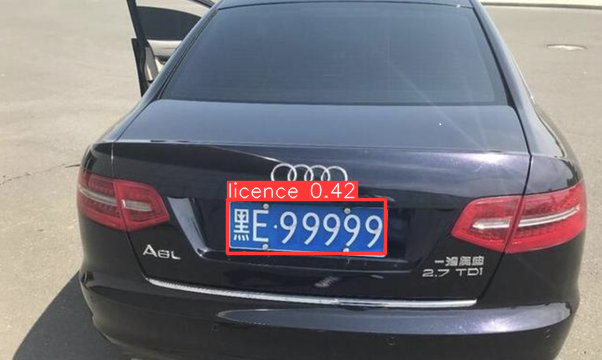

In [44]:
from IPython.display import Image
Image(filename='runs/detect/predict/carImage1.png')

In [45]:

!gdown "https://drive.google.com/uc?id=11Cd4ScvMj3yAvYDrQBERj7Oz7oVGmMka&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=11Cd4ScvMj3yAvYDrQBERj7Oz7oVGmMka&confirm=t
To: /content/yolov10/1.mp4
100% 2.38M/2.38M [00:00<00:00, 18.5MB/s]


In [46]:
!gdown "https://drive.google.com/uc?id=14CTYNzHsQJdnRbKdvB3bA_7CTzUrHHm9&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=14CTYNzHsQJdnRbKdvB3bA_7CTzUrHHm9&confirm=t
To: /content/yolov10/demo.mp4
100% 9.56M/9.56M [00:00<00:00, 30.6MB/s]


In [47]:
!yolo task=detect mode=predict conf=0.25 save=True model='best.pt' source='demo.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [48]:

!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [55]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/predict5/demo.avi'

# Compressed video path
compressed_path = "/content/1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""""" % data_url)


In [56]:
!yolo task=detect mode=predict conf=0.25 save=True model='best.pt' source='1.mp4'

/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:733: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load(file, map_location="cpu")
Ultralytics YO

In [57]:
!rm '/content/result_compressed.mp4'

rm: cannot remove '/content/result_compressed.mp4': No such file or directory


In [60]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = 'runs/detect/predict6/1.avi'

# Compressed video path
compressed_path = "/content/1.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
# HTML("""

# """ % data_url)